In [1]:
import os
import re
import json
import time
import folium
import random
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from bs4 import BeautifulSoup
from selenium import webdriver
import matplotlib.pyplot as plt
from openpyxl.workbook import Workbook
from matplotlib import font_manager, rc
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
from selenium.webdriver.common.by import By
import platform
if platform.system()  == "Windows" :
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc("font", family = font_name)

# 통합파일 불러오기
df = pd.read_csv('./data_new/2017-2019_통합본.csv')
df17 = pd.read_csv('./data_new/2017년_변수정리.csv')
df18 = pd.read_csv('./data_new/2018년_변수정리.csv')
df19 = pd.read_csv('./data_new/2019년_변수정리.csv')

In [2]:
# 3개년 성별 나이별 국가별 방문객 수, 총 소비금액
df_1 = df[['D_GEN', 'D_AGE', 'D_COU1', 'Q1', 'Q14_1T', 'Q16', 'ID', 'D_YEAR']]
df_1['D_YEAR'] = df_1['D_YEAR'].str[:4]
df_1 = df_1.set_index(['D_GEN', 'D_AGE', 'D_COU1', 'Q1', 'Q14_1T', 'Q16', 'ID', 'D_YEAR'])
df_1 = df_1.sort_index().reset_index()
# 17년 성별 나이별 국가별 방문객 수, 총 소비금액
df17_1 = df17[['D_GEN', 'D_AGE', 'D_COU1', 'Q1', 'Q14_1T', 'ID', 'D_YEAR']]
df17_1 = df17_1.set_index(['D_GEN', 'D_AGE', 'D_COU1', 'Q1', 'D_YEAR'])
df17_1 = df17_1.sort_index().reset_index()
# 18년 성별 나이별 국가별 방문객 수, 총 소비금액
df18_1 = df18[['D_GEN', 'D_AGE', 'D_COU1', 'Q1', 'Q14_1T', 'ID', 'D_YEAR']]
df18_1 = df18_1.set_index(['D_GEN', 'D_AGE', 'D_COU1', 'Q1', 'D_YEAR'])
df18_1 = df18_1.sort_index().reset_index()
# 19년 성별 나이별 국가별 방문객 수, 총 소비금액
df19_1 = df19[['D_GEN', 'D_AGE', 'D_COU1', 'Q1', 'Q14_1T', 'ID', 'D_YEAR']]
df19_1 = df19_1.set_index(['D_GEN', 'D_AGE', 'D_COU1', 'Q1', 'D_YEAR'])
df19_1 = df19_1.sort_index().reset_index()
# 3개년 재방문객들의 만족활동, 고려요인, 방문지역, 방한목적
df_2 = df[df['Q1'] > 1][['Q5_2A1', 'Q5_2A2', 'Q5_2A3', 'Q9_2A1', 'Q9_2A2', 'Q9_2A3', 'Q10_2A1', 'Q10_2A2', 'Q10_2A3', 'D_Q5_1']]
# 17년 재방문객들의 만족활동, 고려요인, 방문지역, 방한목적
df17_2 = df17[df17['Q1'] > 1][['Q5_2A1', 'Q5_2A2', 'Q5_2A3', 'Q9_2A1', 'Q9_2A2', 'Q9_2A3', 'Q10_2A1', 'Q10_2A2', 'Q10_2A3', 'D_Q5_1']]
# 18년 재방문객들의 만족활동, 고려요인, 방문지역, 방한목적
df18_2 = df18[df18['Q1'] > 1][['Q5_2A1', 'Q5_2A2', 'Q5_2A3', 'Q9_2A1', 'Q9_2A2', 'Q9_2A3', 'Q10_2A1', 'Q10_2A2', 'Q10_2A3', 'D_Q5_1']]
# 19년 재방문객들의 만족활동, 고려요인, 방문지역, 방한목적
df19_2 = df19[df19['Q1'] > 1][['Q5_2A1', 'Q5_2A2', 'Q5_2A3', 'Q9_2A1', 'Q9_2A2', 'Q9_2A3', 'Q10_2A1', 'Q10_2A2', 'Q10_2A3', 'D_Q5_1']]

C:\Users\USER\AppData\Local\Temp\ipykernel_11112\3577148537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['D_YEAR'] = df_1['D_YEAR'].str[:4]


In [3]:
# 3개년 방문객 방문지역 변수값 통합(제주, 동대문시장, 명동, ...)
df_2['Q10_2A1'] = df_2['Q10_2A1'].replace('제주올레길', '[제주]')
df_2['Q10_2A1'] = df_2['Q10_2A1'].replace('제주민속촌', '[제주]')
df_2['Q10_2A1'] = df_2['Q10_2A1'].replace('성산일출봉', '[제주]')
df_2['Q10_2A1'] = df_2['Q10_2A1'].replace('테디베어 박물관', '[제주]')
df_2['Q10_2A1'] = df_2['Q10_2A1'].replace('한라산', '[제주]')
df_2['Q10_2A1'] = df_2['Q10_2A1'].replace('중문관광단지/서귀포', '[제주]')
df_2['Q10_2A2'] = df_2['Q10_2A2'].replace('제주올레길', '[제주]')
df_2['Q10_2A2'] = df_2['Q10_2A2'].replace('제주민속촌', '[제주]')
df_2['Q10_2A2'] = df_2['Q10_2A2'].replace('성산일출봉', '[제주]')
df_2['Q10_2A2'] = df_2['Q10_2A2'].replace('테디베어 박물관', '[제주]')
df_2['Q10_2A2'] = df_2['Q10_2A2'].replace('한라산', '[제주]')
df_2['Q10_2A2'] = df_2['Q10_2A2'].replace('중문관광단지/서귀포', '[제주]')
df_2['Q10_2A3'] = df_2['Q10_2A3'].replace('제주올레길', '[제주]')
df_2['Q10_2A3'] = df_2['Q10_2A3'].replace('제주민속촌', '[제주]')
df_2['Q10_2A3'] = df_2['Q10_2A3'].replace('성산일출봉', '[제주]')
df_2['Q10_2A3'] = df_2['Q10_2A3'].replace('테디베어 박물관', '[제주]')
df_2['Q10_2A3'] = df_2['Q10_2A3'].replace('한라산', '[제주]')
df_2['Q10_2A3'] = df_2['Q10_2A3'].replace('중문관광단지/서귀포', '[제주]')

df_2['Q10_2A1'] = df_2['Q10_2A1'].replace('동대문시장', '동대문 패션타운')
df_2['Q10_2A1'] = df_2['Q10_2A1'].replace('한옥마을(남산)', '남산/N 서울타워')
df_2['Q10_2A2'] = df_2['Q10_2A2'].replace('동대문시장', '동대문 패션타운')
df_2['Q10_2A2'] = df_2['Q10_2A2'].replace('한옥마을(남산)', '남산/N 서울타워')
df_2['Q10_2A3'] = df_2['Q10_2A3'].replace('동대문시장', '동대문 패션타운')
df_2['Q10_2A3'] = df_2['Q10_2A3'].replace('한옥마을(남산)', '남산/N 서울타워')

df_2['Q10_2A1'] = df_2['Q10_2A1'].replace('명동', '명동/남대문/북창')
df_2['Q10_2A1'] = df_2['Q10_2A1'].replace('남대문시장', '명동/남대문/북창')
df_2['Q10_2A2'] = df_2['Q10_2A2'].replace('명동', '명동/남대문/북창')
df_2['Q10_2A2'] = df_2['Q10_2A2'].replace('남대문시장', '명동/남대문/북창')
df_2['Q10_2A3'] = df_2['Q10_2A3'].replace('명동', '명동/남대문/북창')
df_2['Q10_2A3'] = df_2['Q10_2A3'].replace('남대문시장', '명동/남대문/북창')

df_2['Q10_2A1'] = df_2['Q10_2A1'].replace('이태원', '이태원 (이태원 세계 음식거리, 한남동)')
df_2['Q10_2A1'] = df_2['Q10_2A1'].replace('해운대(해수욕장/누리마루APEC 하우스(동백섬))', '해운대 일대')
df_2['Q10_2A1'] = df_2['Q10_2A1'].replace('달맞이고개', '해운대 일대')
df_2['Q10_2A2'] = df_2['Q10_2A2'].replace('이태원', '이태원 (이태원 세계 음식거리, 한남동)')
df_2['Q10_2A2'] = df_2['Q10_2A2'].replace('해운대(해수욕장/누리마루APEC 하우스(동백섬))', '해운대 일대')
df_2['Q10_2A2'] = df_2['Q10_2A2'].replace('달맞이고개', '해운대 일대')
df_2['Q10_2A3'] = df_2['Q10_2A3'].replace('이태원', '이태원 (이태원 세계 음식거리, 한남동)')
df_2['Q10_2A3'] = df_2['Q10_2A3'].replace('해운대(해수욕장/누리마루APEC 하우스(동백섬))', '해운대 일대')
df_2['Q10_2A3'] = df_2['Q10_2A3'].replace('달맞이고개', '해운대 일대')

df_2['Q10_2A1'] = df_2['Q10_2A1'].replace('춘천(남이섬)', '춘천 (남이섬)')
df_2['Q10_2A1'] = df_2['Q10_2A1'].replace('잠실(롯데월드)', '잠실')
df_2['Q10_2A2'] = df_2['Q10_2A2'].replace('춘천(남이섬)', '춘천 (남이섬)')
df_2['Q10_2A2'] = df_2['Q10_2A2'].replace('잠실(롯데월드)', '잠실')
df_2['Q10_2A3'] = df_2['Q10_2A3'].replace('춘천(남이섬)', '춘천 (남이섬)')
df_2['Q10_2A3'] = df_2['Q10_2A3'].replace('잠실(롯데월드)', '잠실')

df_2['Q10_2A1'] = df_2['Q10_2A1'].replace('청계천/광화문광장', '종로/청계')
df_2['Q10_2A1'] = df_2['Q10_2A1'].replace('광화문광장', '종로/청계')
df_2['Q10_2A1'] = df_2['Q10_2A1'].replace('시청/광화문광장', '종로/청계')
df_2['Q10_2A2'] = df_2['Q10_2A2'].replace('청계천/광화문광장', '종로/청계')
df_2['Q10_2A2'] = df_2['Q10_2A2'].replace('광화문광장', '종로/청계')
df_2['Q10_2A2'] = df_2['Q10_2A2'].replace('시청/광화문광장', '종로/청계')
df_2['Q10_2A3'] = df_2['Q10_2A3'].replace('청계천/광화문광장', '종로/청계')
df_2['Q10_2A3'] = df_2['Q10_2A3'].replace('광화문광장', '종로/청계')
df_2['Q10_2A3'] = df_2['Q10_2A3'].replace('시청/광화문광장', '종로/청계')

df_2['Q10_2A1'] = df_2['Q10_2A1'].replace('용두산공원/BIFF광장/자갈치/국제시장', '용두산/자갈치')
df_2['Q10_2A2'] = df_2['Q10_2A2'].replace('용두산공원/BIFF광장/자갈치/국제시장', '용두산/자갈치')
df_2['Q10_2A3'] = df_2['Q10_2A3'].replace('용두산공원/BIFF광장/자갈치/국제시장', '용두산/자갈치')

# 17년 방문객 방문지역 변수값 통합(제주, 동대문시장, 명동, ...)
df17_2['Q10_2A1'] = df17_2['Q10_2A1'].replace('제주올레길', '[제주]')
df17_2['Q10_2A1'] = df17_2['Q10_2A1'].replace('제주민속촌', '[제주]')
df17_2['Q10_2A1'] = df17_2['Q10_2A1'].replace('성산일출봉', '[제주]')
df17_2['Q10_2A1'] = df17_2['Q10_2A1'].replace('테디베어 박물관', '[제주]')
df17_2['Q10_2A1'] = df17_2['Q10_2A1'].replace('한라산', '[제주]')
df17_2['Q10_2A1'] = df17_2['Q10_2A1'].replace('중문관광단지/서귀포', '[제주]')
df17_2['Q10_2A2'] = df17_2['Q10_2A2'].replace('제주올레길', '[제주]')
df17_2['Q10_2A2'] = df17_2['Q10_2A2'].replace('제주민속촌', '[제주]')
df17_2['Q10_2A2'] = df17_2['Q10_2A2'].replace('성산일출봉', '[제주]')
df17_2['Q10_2A2'] = df17_2['Q10_2A2'].replace('테디베어 박물관', '[제주]')
df17_2['Q10_2A2'] = df17_2['Q10_2A2'].replace('한라산', '[제주]')
df17_2['Q10_2A2'] = df17_2['Q10_2A2'].replace('중문관광단지/서귀포', '[제주]')
df17_2['Q10_2A3'] = df17_2['Q10_2A3'].replace('제주올레길', '[제주]')
df17_2['Q10_2A3'] = df17_2['Q10_2A3'].replace('제주민속촌', '[제주]')
df17_2['Q10_2A3'] = df17_2['Q10_2A3'].replace('성산일출봉', '[제주]')
df17_2['Q10_2A3'] = df17_2['Q10_2A3'].replace('테디베어 박물관', '[제주]')
df17_2['Q10_2A3'] = df17_2['Q10_2A3'].replace('한라산', '[제주]')
df17_2['Q10_2A3'] = df17_2['Q10_2A3'].replace('중문관광단지/서귀포', '[제주]')

df17_2['Q10_2A1'] = df17_2['Q10_2A1'].replace('동대문시장', '동대문 패션타운')
df17_2['Q10_2A1'] = df17_2['Q10_2A1'].replace('한옥마을(남산)', '남산/N 서울타워')
df17_2['Q10_2A2'] = df17_2['Q10_2A2'].replace('동대문시장', '동대문 패션타운')
df17_2['Q10_2A2'] = df17_2['Q10_2A2'].replace('한옥마을(남산)', '남산/N 서울타워')
df17_2['Q10_2A3'] = df17_2['Q10_2A3'].replace('동대문시장', '동대문 패션타운')
df17_2['Q10_2A3'] = df17_2['Q10_2A3'].replace('한옥마을(남산)', '남산/N 서울타워')

df17_2['Q10_2A1'] = df17_2['Q10_2A1'].replace('명동', '명동/남대문/북창')
df17_2['Q10_2A1'] = df17_2['Q10_2A1'].replace('남대문시장', '명동/남대문/북창')
df17_2['Q10_2A2'] = df17_2['Q10_2A2'].replace('명동', '명동/남대문/북창')
df17_2['Q10_2A2'] = df17_2['Q10_2A2'].replace('남대문시장', '명동/남대문/북창')
df17_2['Q10_2A3'] = df17_2['Q10_2A3'].replace('명동', '명동/남대문/북창')
df17_2['Q10_2A3'] = df17_2['Q10_2A3'].replace('남대문시장', '명동/남대문/북창')

df17_2['Q10_2A1'] = df17_2['Q10_2A1'].replace('이태원', '이태원 (이태원 세계 음식거리, 한남동)')
df17_2['Q10_2A1'] = df17_2['Q10_2A1'].replace('해운대(해수욕장/누리마루APEC 하우스(동백섬))', '해운대 일대')
df17_2['Q10_2A1'] = df17_2['Q10_2A1'].replace('달맞이고개', '해운대 일대')
df17_2['Q10_2A2'] = df17_2['Q10_2A2'].replace('이태원', '이태원 (이태원 세계 음식거리, 한남동)')
df17_2['Q10_2A2'] = df17_2['Q10_2A2'].replace('해운대(해수욕장/누리마루APEC 하우스(동백섬))', '해운대 일대')
df17_2['Q10_2A2'] = df17_2['Q10_2A2'].replace('달맞이고개', '해운대 일대')
df17_2['Q10_2A3'] = df17_2['Q10_2A3'].replace('이태원', '이태원 (이태원 세계 음식거리, 한남동)')
df17_2['Q10_2A3'] = df17_2['Q10_2A3'].replace('해운대(해수욕장/누리마루APEC 하우스(동백섬))', '해운대 일대')
df17_2['Q10_2A3'] = df17_2['Q10_2A3'].replace('달맞이고개', '해운대 일대')

df17_2['Q10_2A1'] = df17_2['Q10_2A1'].replace('춘천(남이섬)', '춘천 (남이섬)')
df17_2['Q10_2A1'] = df17_2['Q10_2A1'].replace('잠실(롯데월드)', '잠실')
df17_2['Q10_2A2'] = df17_2['Q10_2A2'].replace('춘천(남이섬)', '춘천 (남이섬)')
df17_2['Q10_2A2'] = df17_2['Q10_2A2'].replace('잠실(롯데월드)', '잠실')
df17_2['Q10_2A3'] = df17_2['Q10_2A3'].replace('춘천(남이섬)', '춘천 (남이섬)')
df17_2['Q10_2A3'] = df17_2['Q10_2A3'].replace('잠실(롯데월드)', '잠실')

df17_2['Q10_2A1'] = df17_2['Q10_2A1'].replace('청계천/광화문광장', '종로/청계')
df17_2['Q10_2A1'] = df17_2['Q10_2A1'].replace('광화문광장', '종로/청계')
df17_2['Q10_2A1'] = df17_2['Q10_2A1'].replace('시청/광화문광장', '종로/청계')
df17_2['Q10_2A2'] = df17_2['Q10_2A2'].replace('청계천/광화문광장', '종로/청계')
df17_2['Q10_2A2'] = df17_2['Q10_2A2'].replace('광화문광장', '종로/청계')
df17_2['Q10_2A2'] = df17_2['Q10_2A2'].replace('시청/광화문광장', '종로/청계')
df17_2['Q10_2A3'] = df17_2['Q10_2A3'].replace('청계천/광화문광장', '종로/청계')
df17_2['Q10_2A3'] = df17_2['Q10_2A3'].replace('광화문광장', '종로/청계')
df17_2['Q10_2A3'] = df17_2['Q10_2A3'].replace('시청/광화문광장', '종로/청계')

df17_2['Q10_2A1'] = df17_2['Q10_2A1'].replace('용두산공원/BIFF광장/자갈치/국제시장', '용두산/자갈치')
df17_2['Q10_2A2'] = df17_2['Q10_2A2'].replace('용두산공원/BIFF광장/자갈치/국제시장', '용두산/자갈치')
df17_2['Q10_2A3'] = df17_2['Q10_2A3'].replace('용두산공원/BIFF광장/자갈치/국제시장', '용두산/자갈치')

# 18년 방문객 방문지역 변수값 통합(광화문광장)
df18_2['Q10_2A1'] = df18_2['Q10_2A1'].replace('광화문광장', '종로/청계')
df18_2['Q10_2A2'] = df18_2['Q10_2A2'].replace('광화문광장', '종로/청계')
df18_2['Q10_2A3'] = df18_2['Q10_2A3'].replace('광화문광장', '종로/청계')

# 19년 방문객 방문지역 변수값 통합(시청/광화문광장)
df19_2['Q10_2A1'] = df19_2['Q10_2A1'].replace('시청/광화문광장', '종로/청계')
df19_2['Q10_2A2'] = df19_2['Q10_2A2'].replace('시청/광화문광장', '종로/청계')
df19_2['Q10_2A3'] = df19_2['Q10_2A3'].replace('시청/광화문광장', '종로/청계')

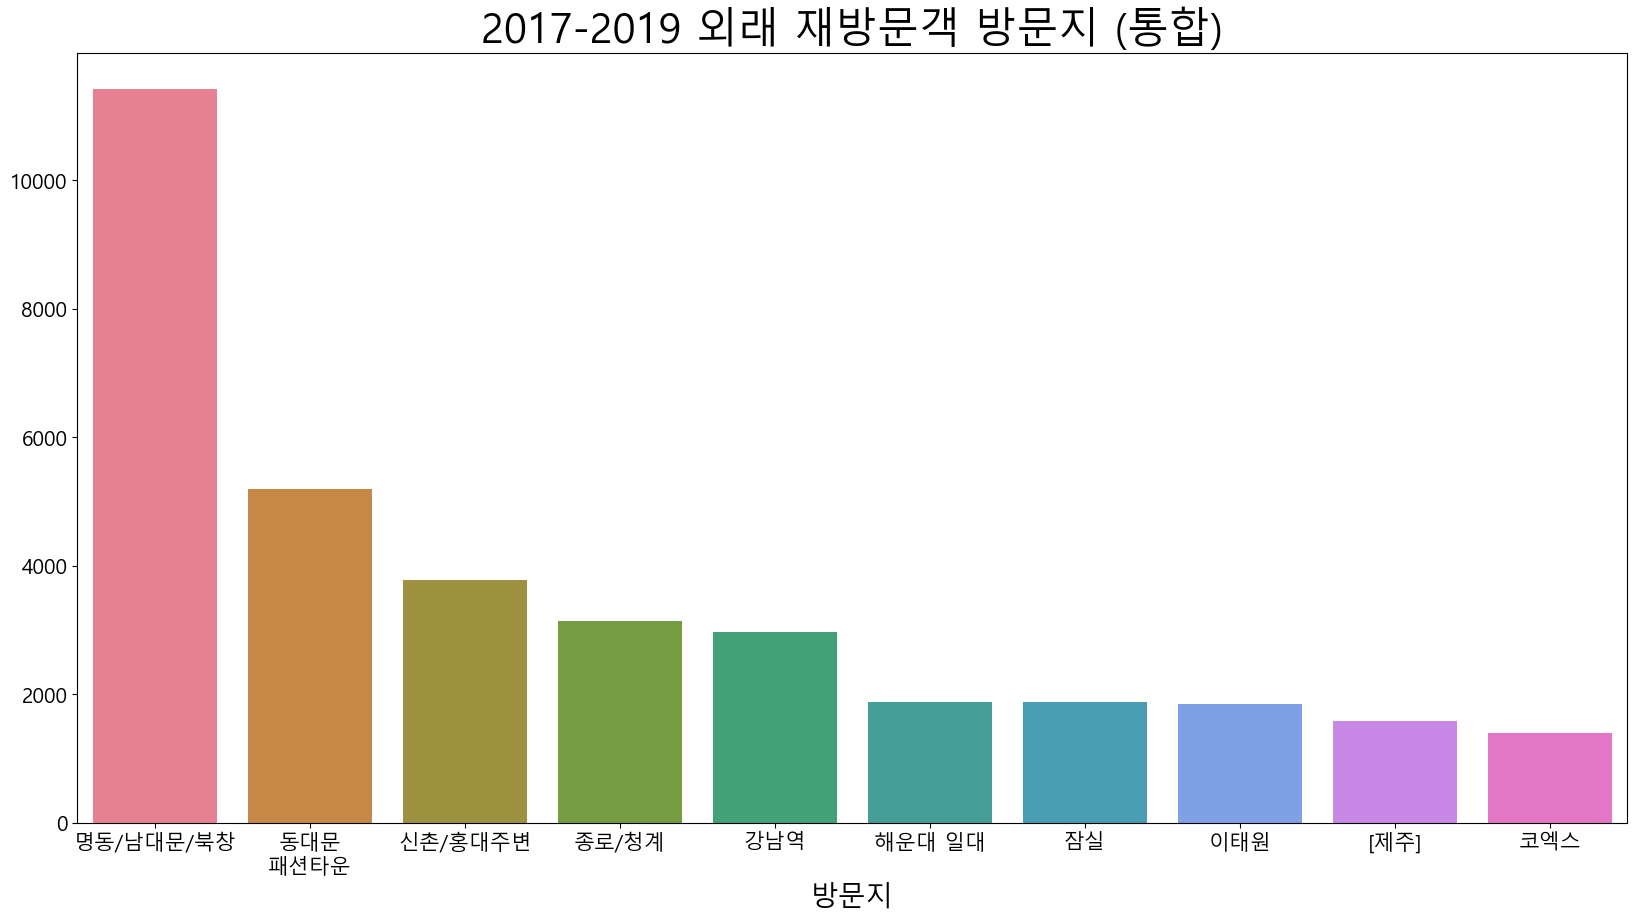

In [4]:
# 방문지 리스트로 뽑기
list1, list2, list3 = df_2['Q10_2A1'].tolist(), df_2['Q10_2A2'].tolist(), df_2['Q10_2A3'].tolist()
list_tot = []
list_tot.extend(list1)
list_tot.extend(list2)
list_tot.extend(list3)

# 순위 컬럼 만들기
list_c1, list_c2, list_c3 = ['1순위'] * 22818, ['2순위'] * 22818, ['3순위'] * 22818
list_ctot = []
list_ctot.extend(list_c1)
list_ctot.extend(list_c2)
list_ctot.extend(list_c3)

# 위 리스트들로 새 데이터 프레임 생성
df_2temp = pd.DataFrame()
df_2temp['방문지'] = list_tot
df_2temp['순위'] = list_ctot

# 10순위까지의 데이터 프레임 재생성
df_2temp1 = df_2temp[df_2temp['방문지'] == '명동/남대문/북창']
df_2temp2 = df_2temp[df_2temp['방문지'] == '동대문 패션타운']
df_2temp3 = df_2temp[df_2temp['방문지'] == '신촌/홍대주변']
df_2temp4 = df_2temp[df_2temp['방문지'] == '종로/청계']
df_2temp5 = df_2temp[df_2temp['방문지'] == '강남역']
df_2temp6 = df_2temp[df_2temp['방문지'] == '해운대 일대']
df_2temp7 = df_2temp[df_2temp['방문지'] == '잠실']
df_2temp8 = df_2temp[df_2temp['방문지'] == '이태원 (이태원 세계 음식거리, 한남동)']
df_2temp9 = df_2temp[df_2temp['방문지'] == '[제주]']
df_2temp10 = df_2temp[df_2temp['방문지'] == '코엑스']

# 통합 후 데이터 이름 가공
df_2tot = pd.concat([df_2temp1, df_2temp2, df_2temp3, df_2temp4,
                     df_2temp5, df_2temp6, df_2temp7, df_2temp8,
                     df_2temp9, df_2temp10], ignore_index = True)

df_2tot['방문지'] = df_2tot['방문지'].replace('이태원 (이태원 세계 음식거리, 한남동)', '이태원')
df_2tot['방문지'] = df_2tot['방문지'].replace('동대문 패션타운', '동대문\n패션타운')

# 시각화
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2017-2019 외래 재방문객 방문지 (통합)', fontdict = {'fontsize': 30})
sns.countplot(x = '방문지', palette = 'husl', data = df_2tot)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('방문지', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.show()

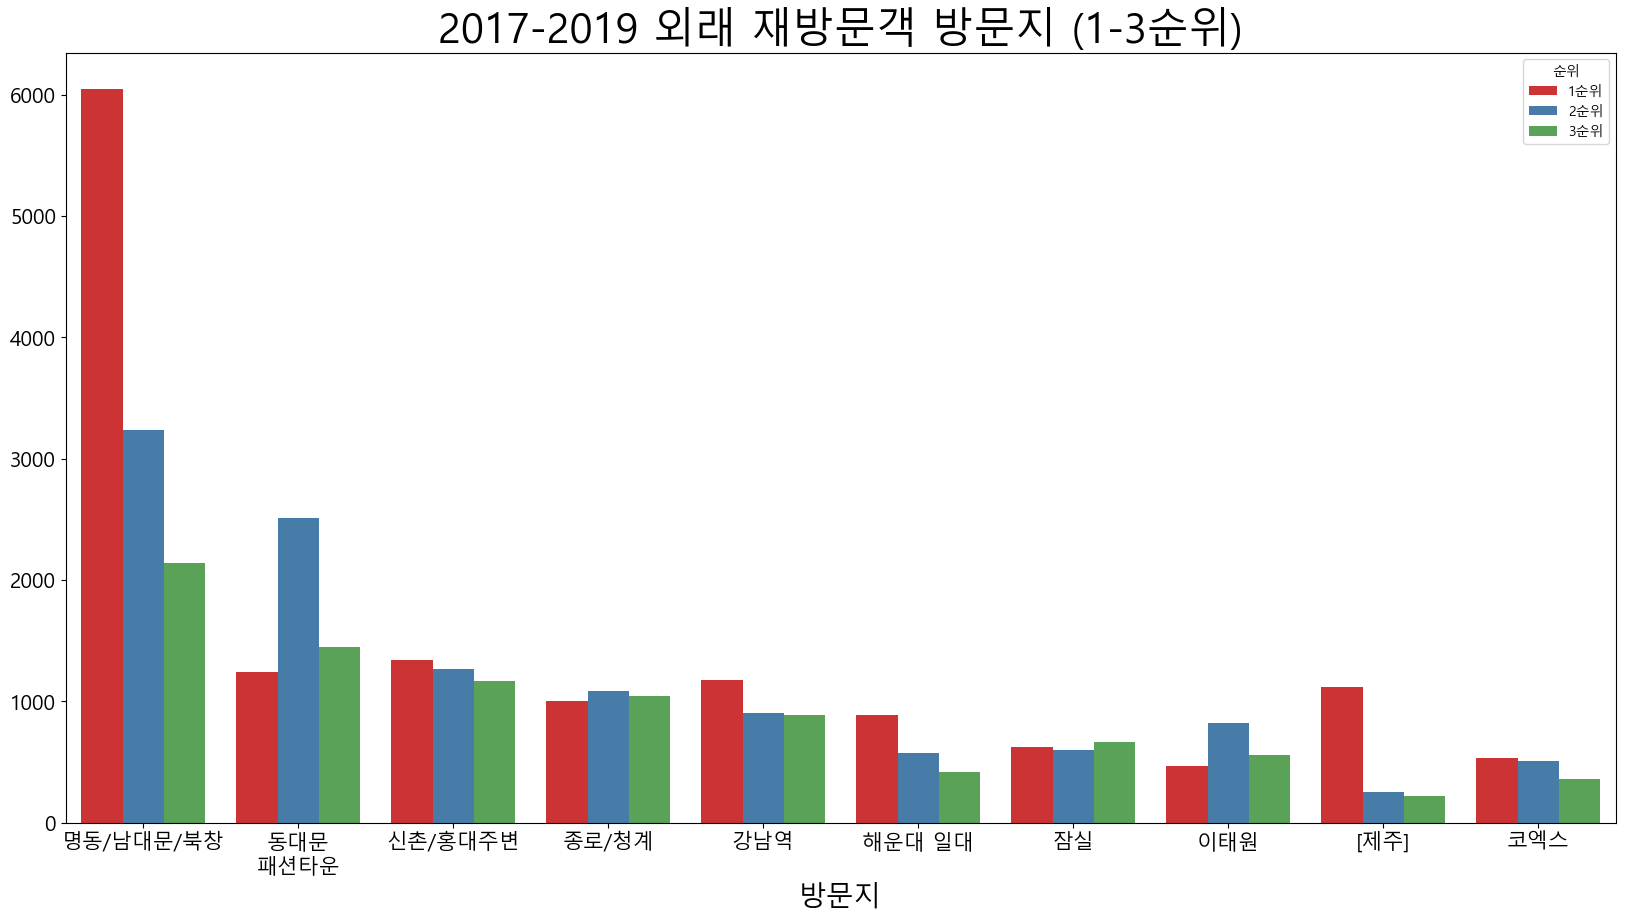

In [5]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2017-2019 외래 재방문객 방문지 (1-3순위)', fontdict = {'fontsize': 30})
sns.countplot(x = '방문지', hue = '순위', palette = 'Set1', data = df_2tot)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('방문지', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.show()

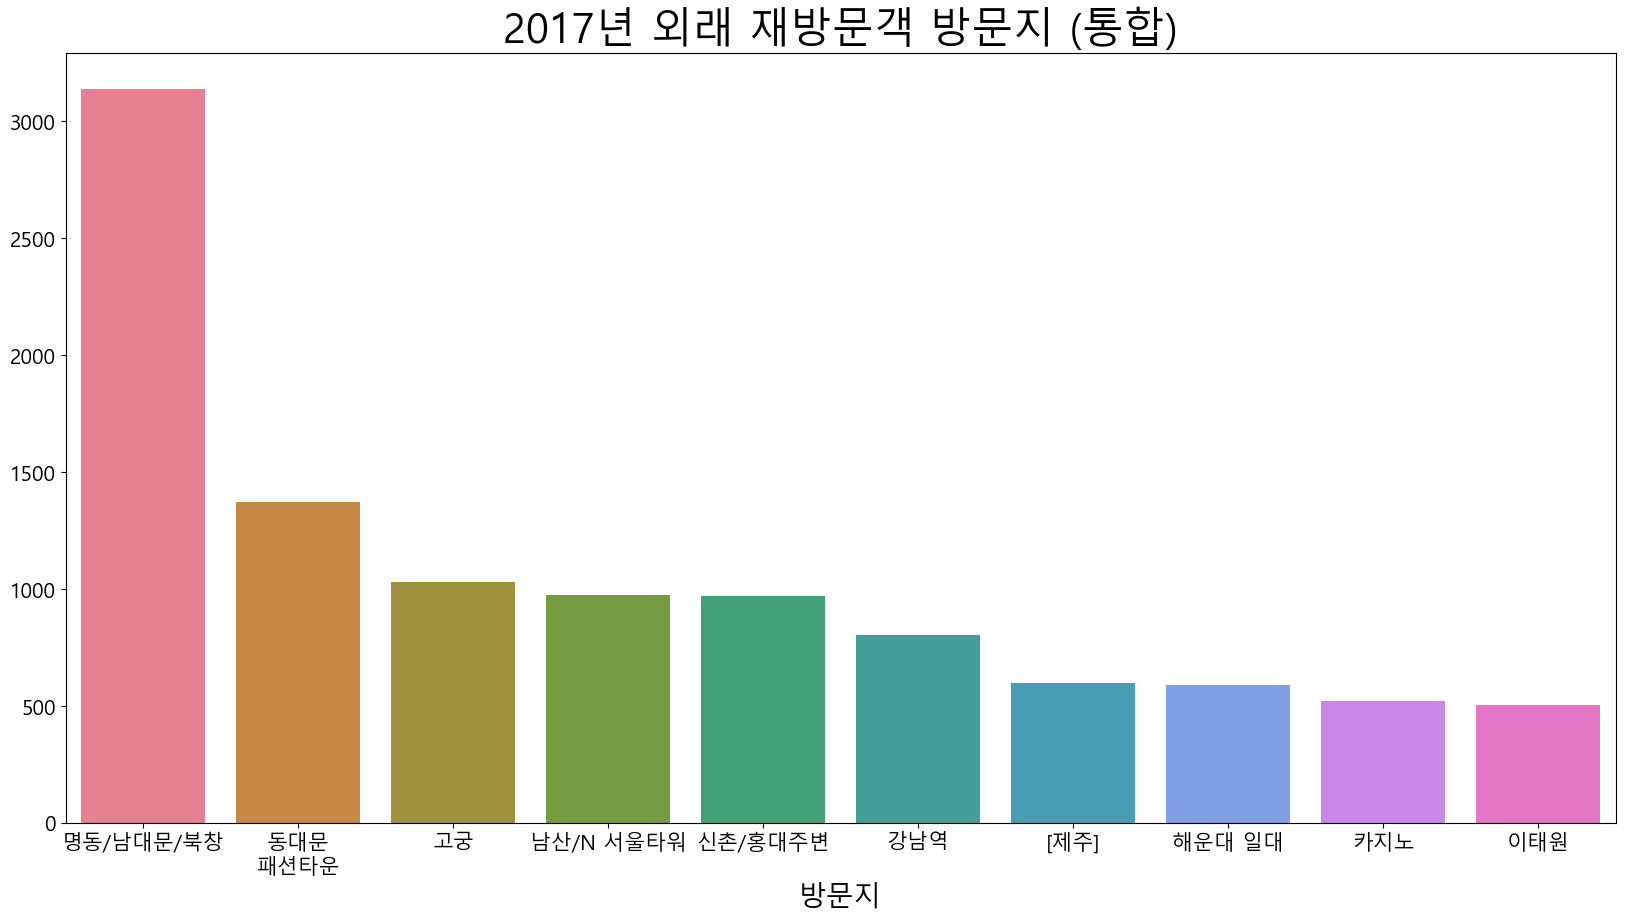

In [6]:
# 방문지 리스트로 뽑기
list17_1, list17_2, list17_3 = df17_2['Q10_2A1'].tolist(), df17_2['Q10_2A2'].tolist(), df17_2['Q10_2A3'].tolist()
list17_tot = []
list17_tot.extend(list17_1)
list17_tot.extend(list17_2)
list17_tot.extend(list17_3)

# 순위 컬럼 만들기
list17_c1, list17_c2, list17_c3 = ['1순위'] * 6856, ['2순위'] * 6856, ['3순위'] * 6856
list17_ctot = []
list17_ctot.extend(list17_c1)
list17_ctot.extend(list17_c2)
list17_ctot.extend(list17_c3)

# 위 리스트들로 새 데이터 프레임 생성
df17_2temp = pd.DataFrame()
df17_2temp['방문지'] = list17_tot
df17_2temp['순위'] = list17_ctot

# 10순위까지의 데이터 프레임 재생성
df17_2temp1 = df17_2temp[df17_2temp['방문지'] == '명동/남대문/북창']
df17_2temp2 = df17_2temp[df17_2temp['방문지'] == '동대문 패션타운']
df17_2temp3 = df17_2temp[df17_2temp['방문지'] == '고궁']
df17_2temp4 = df17_2temp[df17_2temp['방문지'] == '남산/N 서울타워']
df17_2temp5 = df17_2temp[df17_2temp['방문지'] == '신촌/홍대주변']
df17_2temp6 = df17_2temp[df17_2temp['방문지'] == '강남역']
df17_2temp7 = df17_2temp[df17_2temp['방문지'] == '[제주]']
df17_2temp8 = df17_2temp[df17_2temp['방문지'] == '해운대 일대']
df17_2temp9 = df17_2temp[df17_2temp['방문지'] == '카지노']
df17_2temp10 = df17_2temp[df17_2temp['방문지'] == '이태원 (이태원 세계 음식거리, 한남동)']

# 통합 후 데이터 이름 가공
df17_2tot = pd.concat([df17_2temp1, df17_2temp2, df17_2temp3, df17_2temp4,
                       df17_2temp5, df17_2temp6, df17_2temp7, df17_2temp8,
                       df17_2temp9, df17_2temp10], ignore_index = True)

df17_2tot['방문지'] = df17_2tot['방문지'].replace('이태원 (이태원 세계 음식거리, 한남동)', '이태원')
df17_2tot['방문지'] = df17_2tot['방문지'].replace('동대문 패션타운', '동대문\n패션타운')

# 시각화
plt.rcParams['figure.figsize'] = (20,10)
plt.title('2017년 외래 재방문객 방문지 (통합)', fontdict = {'fontsize': 30})
sns.countplot(x = '방문지', palette = 'husl', data = df17_2tot)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('방문지', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.show()

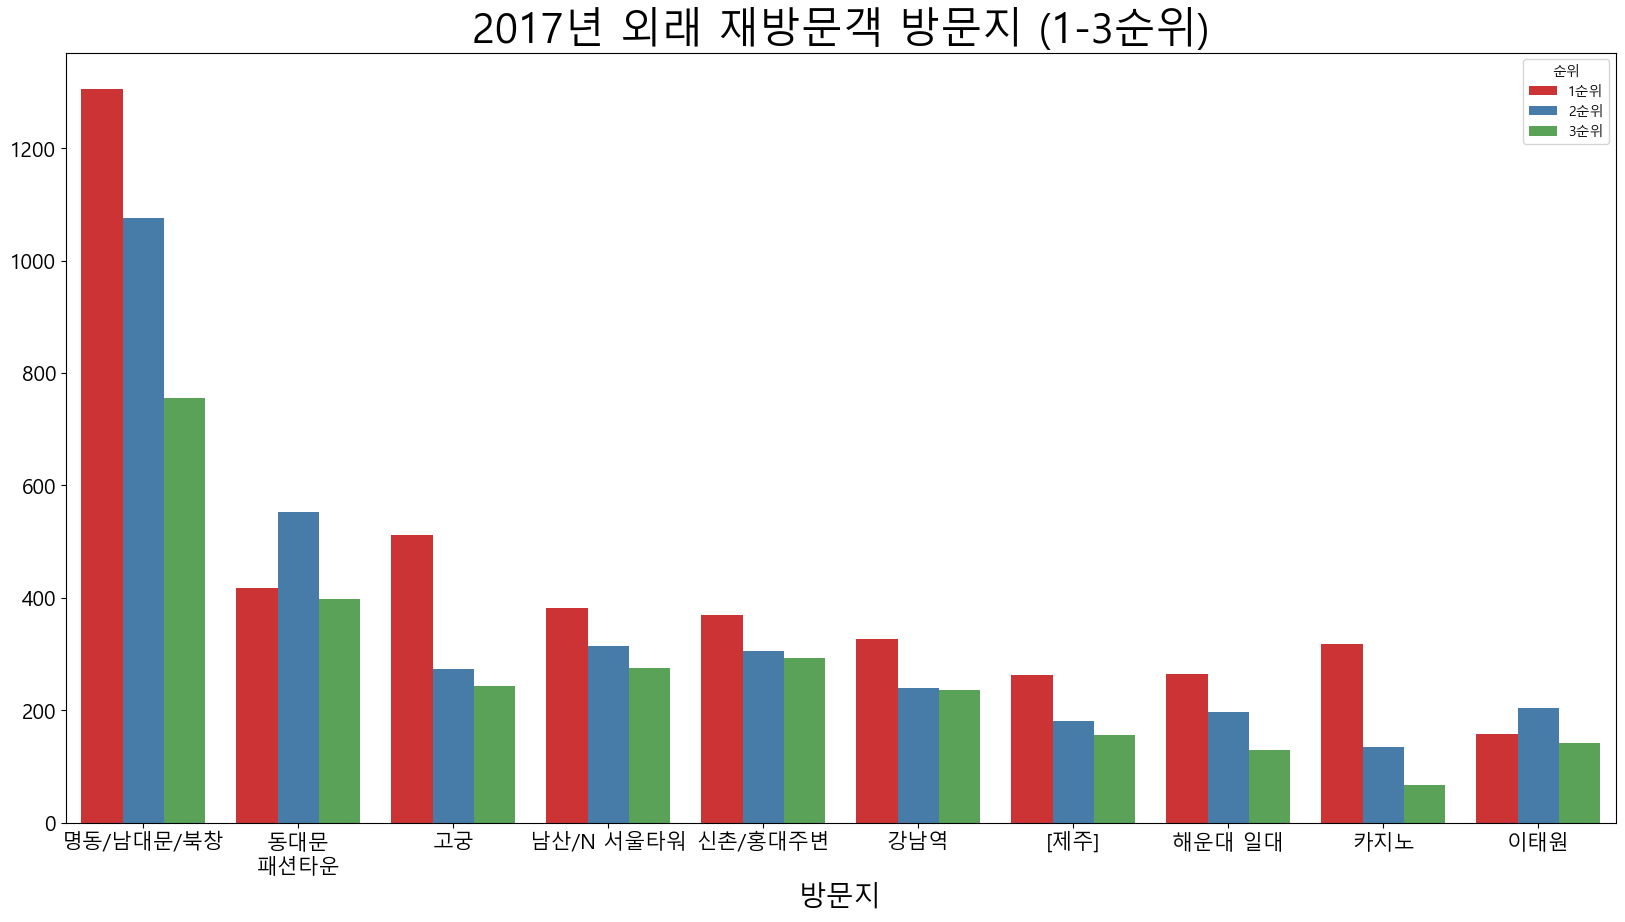

In [7]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2017년 외래 재방문객 방문지 (1-3순위)', fontdict = {'fontsize': 30})
sns.countplot(x = '방문지', hue = '순위', palette = 'Set1', data = df17_2tot)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('방문지', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.show()

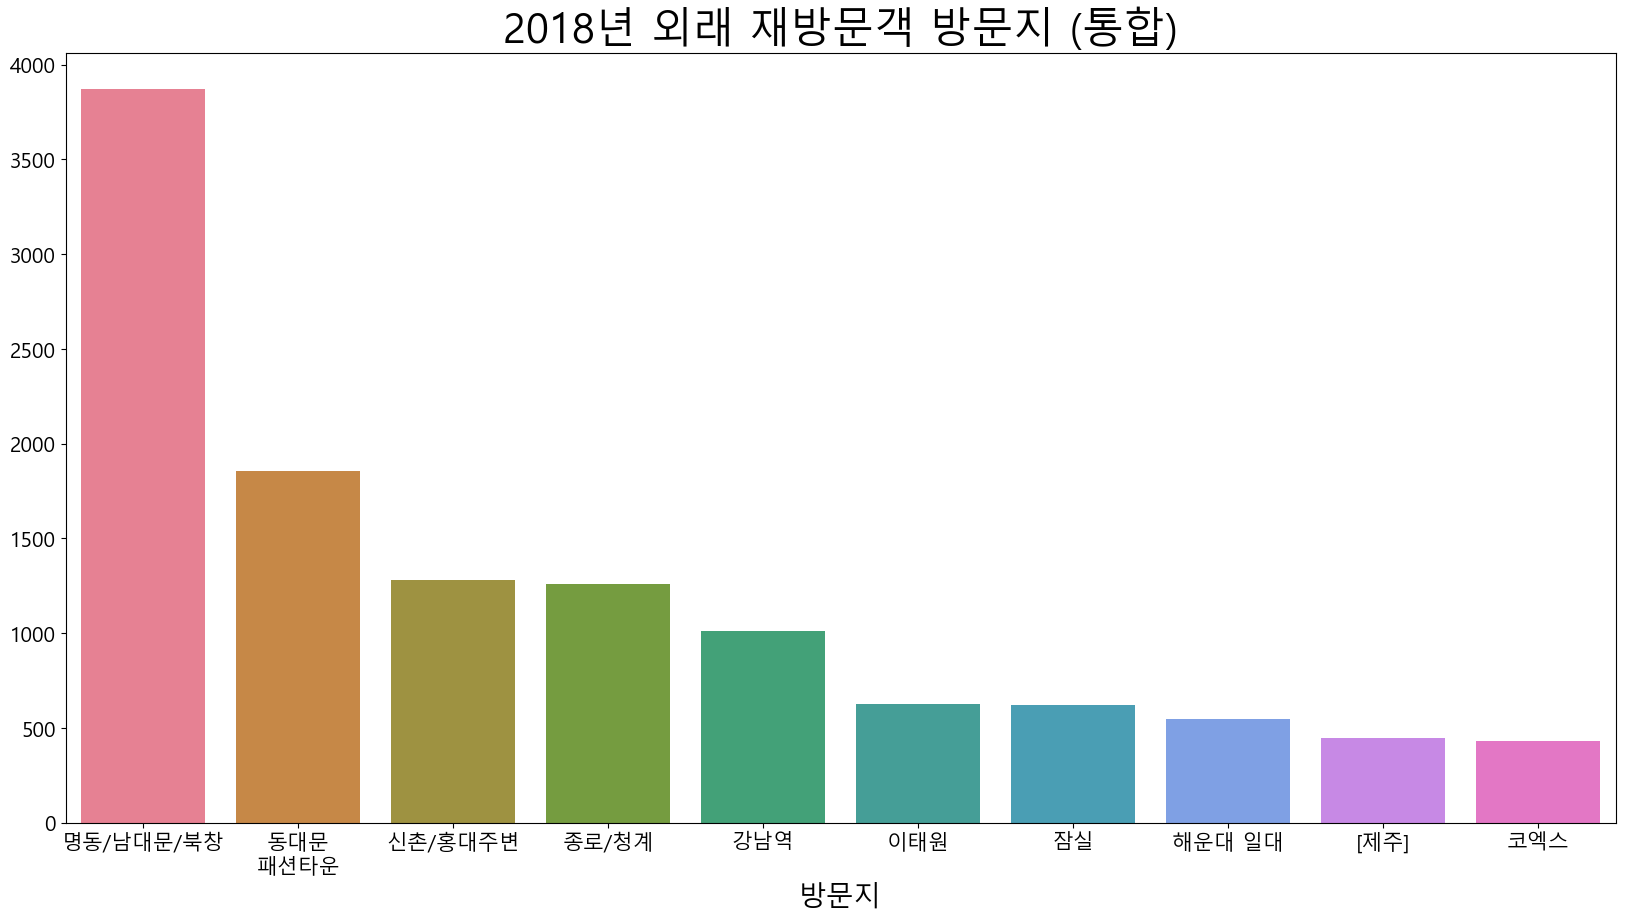

In [8]:
# 방문지 리스트로 뽑기
list18_1, list18_2, list18_3 = df18_2['Q10_2A1'].tolist(), df18_2['Q10_2A2'].tolist(), df18_2['Q10_2A3'].tolist()
list18_tot = []
list18_tot.extend(list18_1)
list18_tot.extend(list18_2)
list18_tot.extend(list18_3)

# 순위 컬럼 만들기
list18_c1, list18_c2, list18_c3 = ['1순위'] * 7154, ['2순위'] * 7154, ['3순위'] * 7154
list18_ctot = []
list18_ctot.extend(list18_c1)
list18_ctot.extend(list18_c2)
list18_ctot.extend(list18_c3)

# 위 리스트들로 새 데이터 프레임 생성
df18_2temp = pd.DataFrame()
df18_2temp['방문지'] = list18_tot
df18_2temp['순위'] = list18_ctot

# 10순위까지의 데이터 프레임 재생성
df18_2temp1 = df18_2temp[df18_2temp['방문지'] == '명동/남대문/북창']
df18_2temp2 = df18_2temp[df18_2temp['방문지'] == '동대문 패션타운']
df18_2temp3 = df18_2temp[df18_2temp['방문지'] == '신촌/홍대주변']
df18_2temp4 = df18_2temp[df18_2temp['방문지'] == '종로/청계']
df18_2temp5 = df18_2temp[df18_2temp['방문지'] == '강남역']
df18_2temp6 = df18_2temp[df18_2temp['방문지'] == '이태원 (이태원 세계 음식거리, 한남동)']
df18_2temp7 = df18_2temp[df18_2temp['방문지'] == '잠실']
df18_2temp8 = df18_2temp[df18_2temp['방문지'] == '해운대 일대']
df18_2temp9 = df18_2temp[df18_2temp['방문지'] == '[제주]']
df18_2temp10 = df18_2temp[df18_2temp['방문지'] == '코엑스']

# 통합 후 데이터 이름 가공
df18_2tot = pd.concat([df18_2temp1, df18_2temp2, df18_2temp3, df18_2temp4,
                       df18_2temp5, df18_2temp6, df18_2temp7, df18_2temp8,
                       df18_2temp9, df18_2temp10], ignore_index = True)

df18_2tot['방문지'] = df18_2tot['방문지'].replace('이태원 (이태원 세계 음식거리, 한남동)', '이태원')
df18_2tot['방문지'] = df18_2tot['방문지'].replace('동대문 패션타운', '동대문\n패션타운')

# 시각화
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2018년 외래 재방문객 방문지 (통합)', fontdict = {'fontsize': 30})
sns.countplot(x = '방문지', palette = 'husl', data = df18_2tot)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('방문지', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.show()

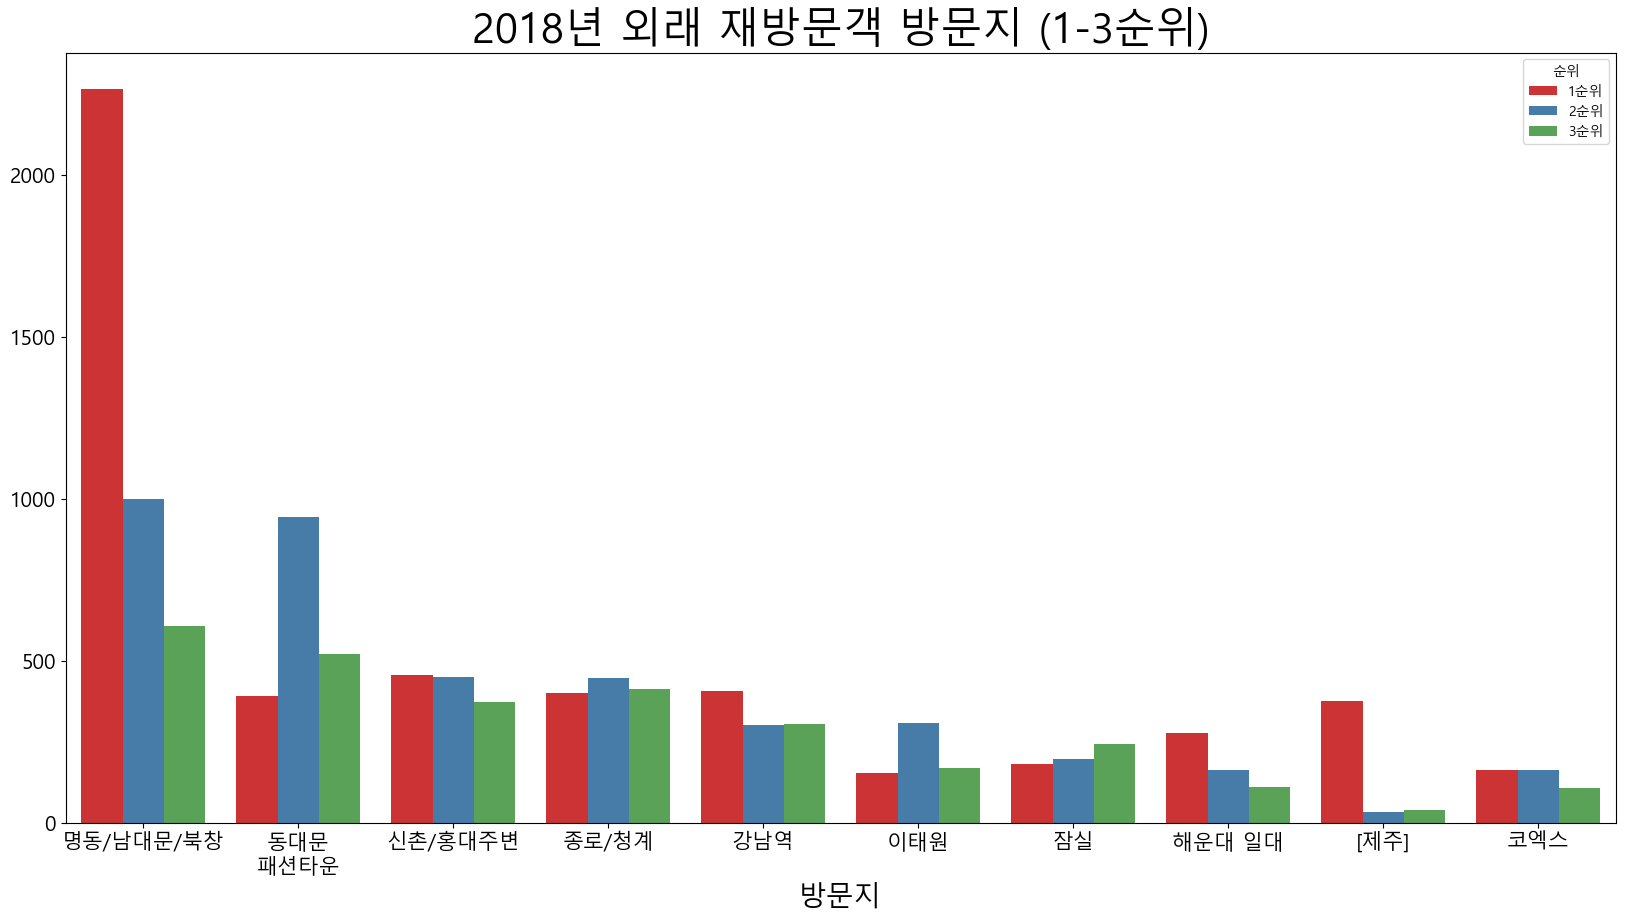

In [9]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2018년 외래 재방문객 방문지 (1-3순위)', fontdict = {'fontsize': 30})
sns.countplot(x = '방문지', hue = '순위', palette = 'Set1', data = df18_2tot)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('방문지', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.show()

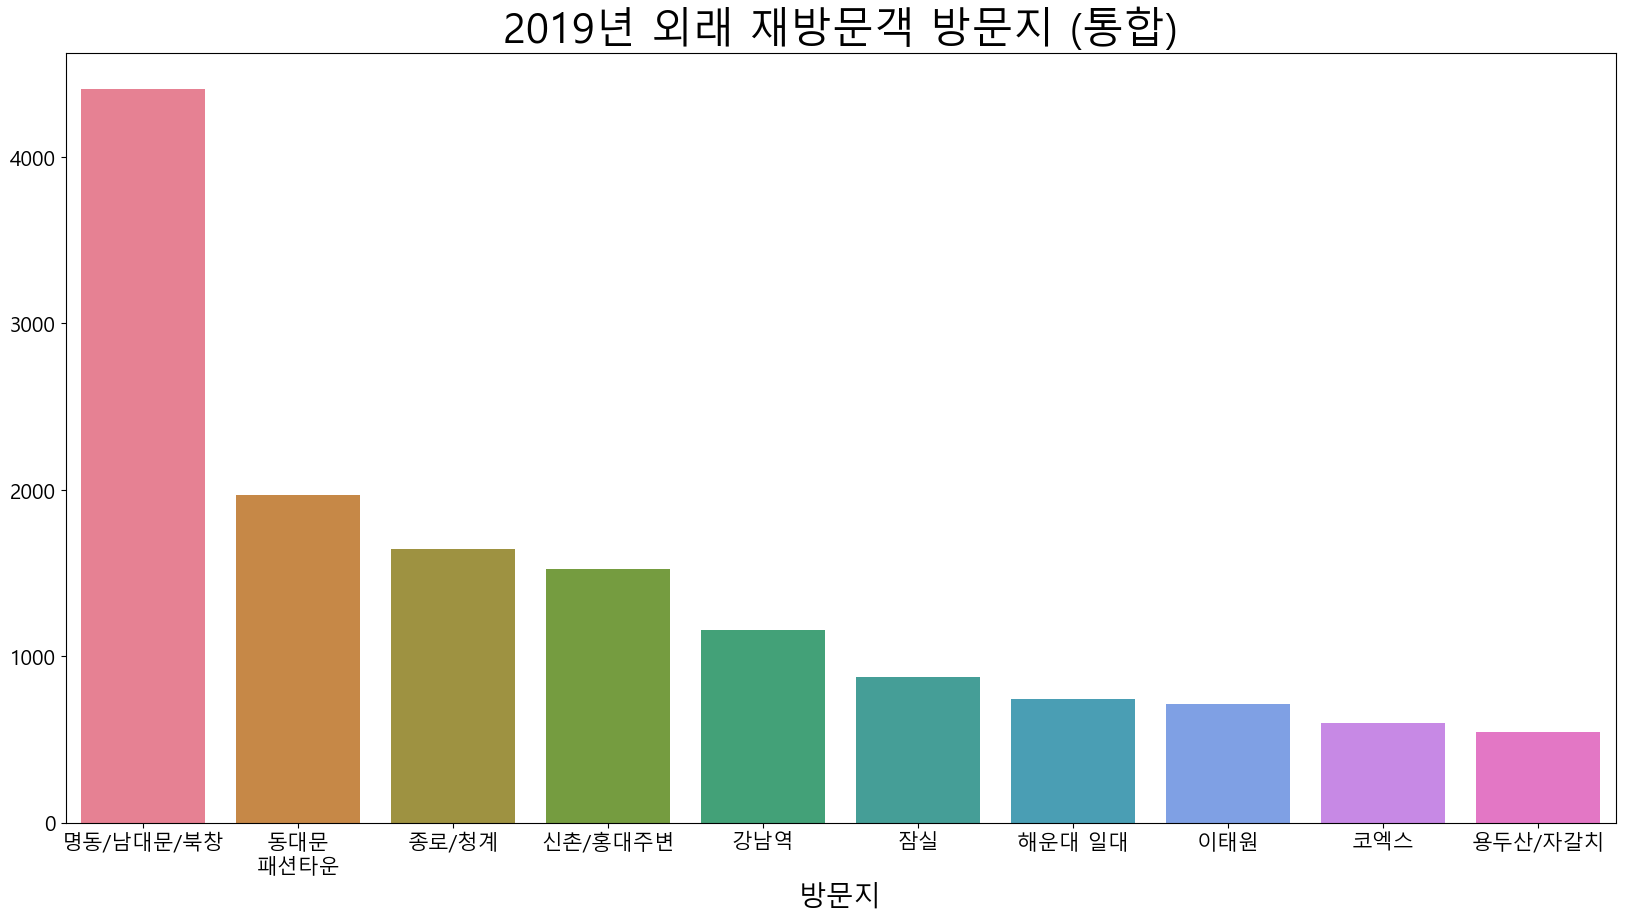

In [10]:
# 방문지 리스트로 뽑기
list19_1, list19_2, list19_3 = df19_2['Q10_2A1'].tolist(), df19_2['Q10_2A2'].tolist(), df19_2['Q10_2A3'].tolist()
list19_tot = []
list19_tot.extend(list19_1)
list19_tot.extend(list19_2)
list19_tot.extend(list19_3)

# 순위 컬럼 만들기
list19_c1, list19_c2, list19_c3 = ['1순위'] * 8808, ['2순위'] * 8808, ['3순위'] * 8808
list19_ctot = []
list19_ctot.extend(list19_c1)
list19_ctot.extend(list19_c2)
list19_ctot.extend(list19_c3)

# 위 리스트들로 새 데이터 프레임 생성
df19_2temp = pd.DataFrame()
df19_2temp['방문지'] = list19_tot
df19_2temp['순위'] = list19_ctot

# 10순위까지의 데이터 프레임 재생성
df19_2temp1 = df19_2temp[df19_2temp['방문지'] == '명동/남대문/북창']
df19_2temp2 = df19_2temp[df19_2temp['방문지'] == '동대문 패션타운']
df19_2temp3 = df19_2temp[df19_2temp['방문지'] == '종로/청계']
df19_2temp4 = df19_2temp[df19_2temp['방문지'] == '신촌/홍대주변']
df19_2temp5 = df19_2temp[df19_2temp['방문지'] == '강남역']
df19_2temp6 = df19_2temp[df19_2temp['방문지'] == '잠실']
df19_2temp7 = df19_2temp[df19_2temp['방문지'] == '해운대 일대']
df19_2temp8 = df19_2temp[df19_2temp['방문지'] == '이태원 (이태원 세계 음식거리, 한남동)']
df19_2temp9 = df19_2temp[df19_2temp['방문지'] == '코엑스']
df19_2temp10 = df19_2temp[df19_2temp['방문지'] == '용두산/자갈치']

# 통합 후 데이터 이름 가공
df19_2tot = pd.concat([df19_2temp1, df19_2temp2, df19_2temp3, df19_2temp4,
                       df19_2temp5, df19_2temp6, df19_2temp7, df19_2temp8,
                       df19_2temp9, df19_2temp10], ignore_index = True)

df19_2tot['방문지'] = df19_2tot['방문지'].replace('이태원 (이태원 세계 음식거리, 한남동)', '이태원')
df19_2tot['방문지'] = df19_2tot['방문지'].replace('동대문 패션타운', '동대문\n패션타운')

# 시각화
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2019년 외래 재방문객 방문지 (통합)', fontdict = {'fontsize': 30})
sns.countplot(x = '방문지', palette = 'husl', data = df19_2tot)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('방문지', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.show()

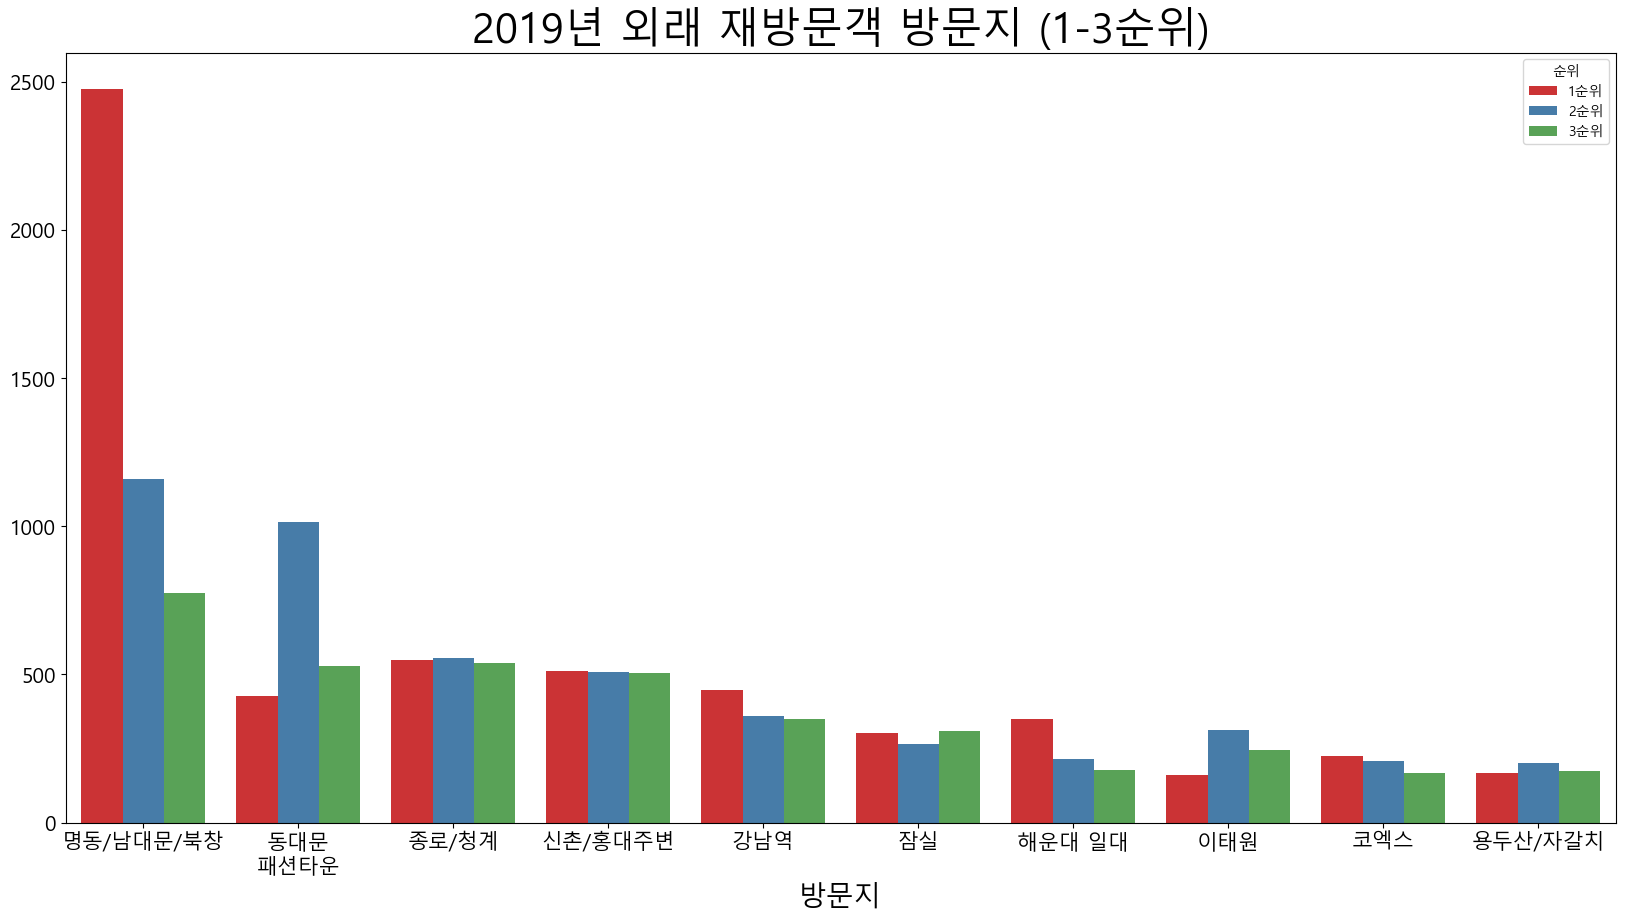

In [11]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2019년 외래 재방문객 방문지 (1-3순위)', fontdict = {'fontsize': 30})
sns.countplot(x = '방문지', hue = '순위', palette = 'Set1', data = df19_2tot)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('방문지', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.show()

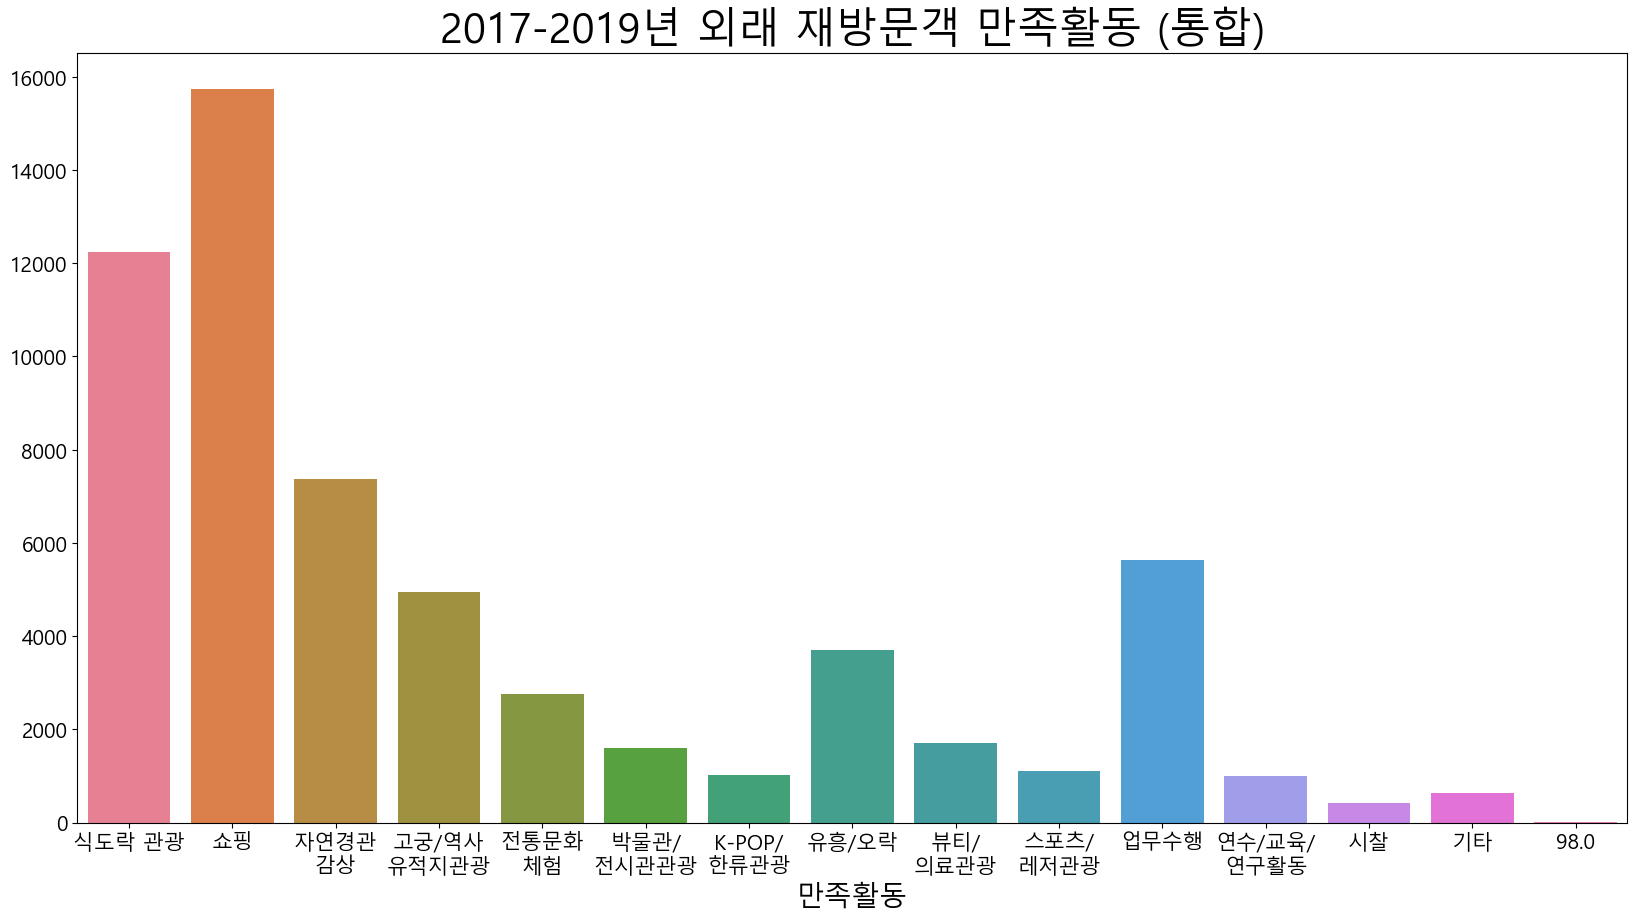

In [12]:
# 만족활동 리스트로 뽑기
list_11, list_21, list_31 = df_2['Q9_2A1'].tolist(), df_2['Q9_2A2'].tolist(), df_2['Q9_2A3'].tolist()
list_1tot = []
list_1tot.extend(list_11)
list_1tot.extend(list_21)
list_1tot.extend(list_31)

# 위 리스트들로 새 데이터 프레임 생성
df_21temp = pd.DataFrame()
df_21temp['만족활동'] = list_1tot
df_21temp['순위'] = list_ctot

# 만족활동 변수값 순으로 오름차순 정렬
df_21temp = df_21temp.iloc[df_21temp.sort_values(by = ['만족활동', '순위']).index, :].reset_index(drop = True)

# 만족활동 변수값 변경
df_21temp['만족활동'] = df_21temp['만족활동'].replace(1.0, '식도락 관광')
df_21temp['만족활동'] = df_21temp['만족활동'].replace(2.0, '쇼핑')
df_21temp['만족활동'] = df_21temp['만족활동'].replace(3.0, '자연경관\n감상')
df_21temp['만족활동'] = df_21temp['만족활동'].replace(4.0, '고궁/역사\n유적지관광')
df_21temp['만족활동'] = df_21temp['만족활동'].replace(5.0, '전통문화\n체험')
df_21temp['만족활동'] = df_21temp['만족활동'].replace(6.0, '박물관/\n전시관관광')
df_21temp['만족활동'] = df_21temp['만족활동'].replace(7.0, 'K-POP/\n한류관광')
df_21temp['만족활동'] = df_21temp['만족활동'].replace(8.0, '유흥/오락')
df_21temp['만족활동'] = df_21temp['만족활동'].replace(9.0, '뷰티/\n의료관광')
df_21temp['만족활동'] = df_21temp['만족활동'].replace(10.0, '스포츠/\n레저관광')
df_21temp['만족활동'] = df_21temp['만족활동'].replace(11.0, '업무수행')
df_21temp['만족활동'] = df_21temp['만족활동'].replace(12.0, '연수/교육/\n연구활동')
df_21temp['만족활동'] = df_21temp['만족활동'].replace(13.0, '시찰')
df_21temp['만족활동'] = df_21temp['만족활동'].replace(14.0, '기타')

# 시각화
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2017-2019년 외래 재방문객 만족활동 (통합)', fontdict = {'fontsize': 30})
sns.countplot(x = '만족활동', palette = 'husl', data = df_21temp)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('만족활동', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.show()

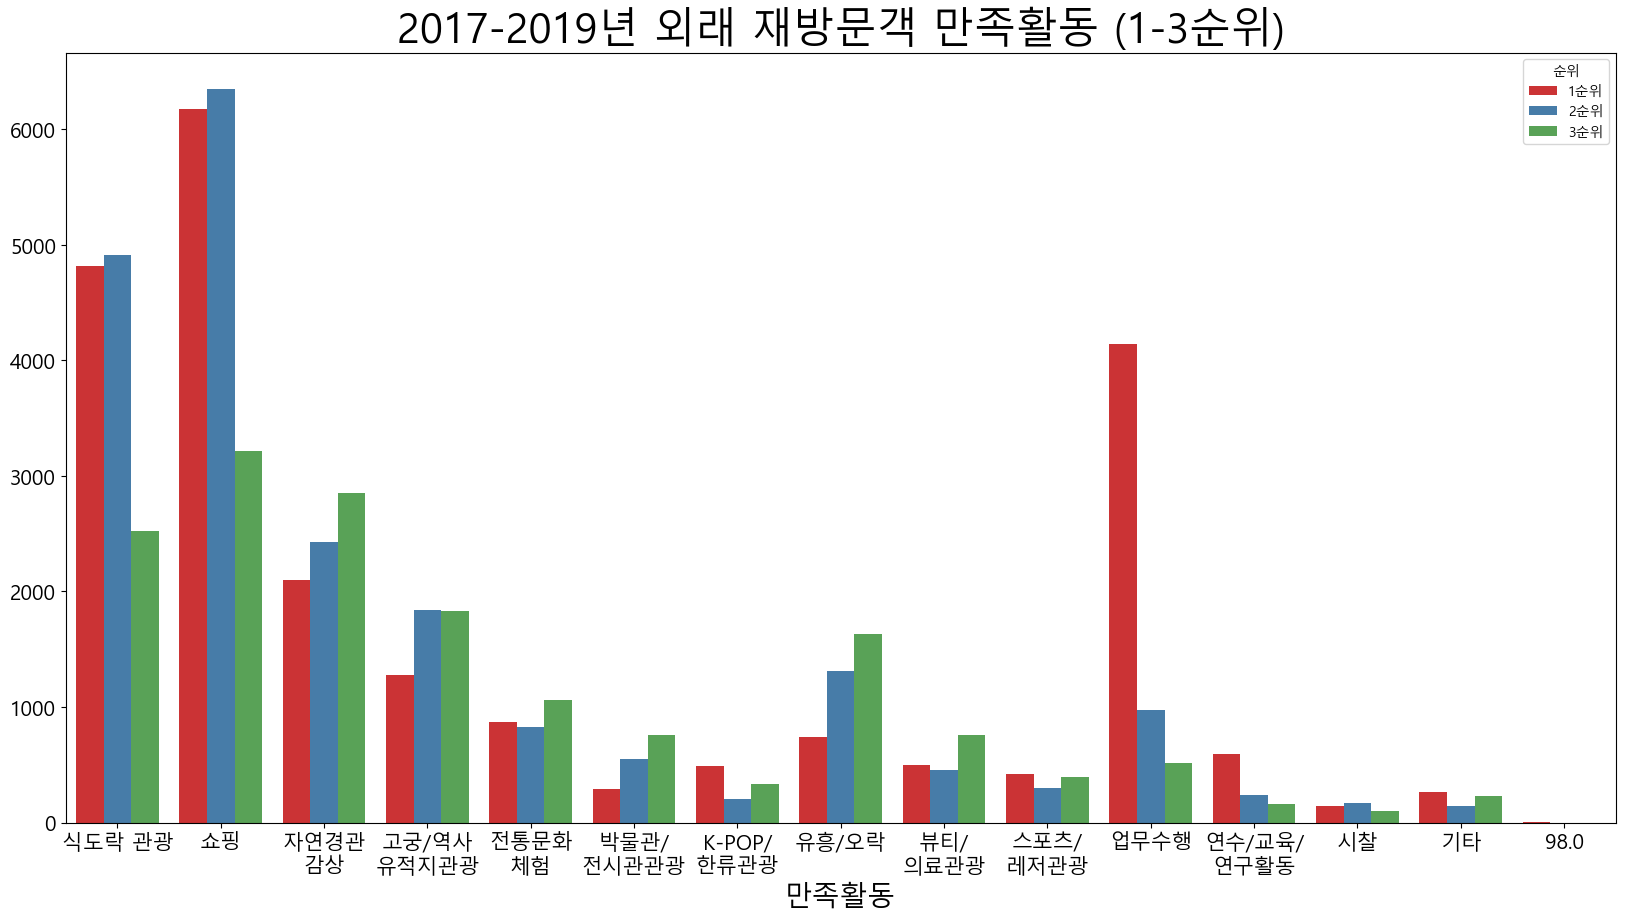

In [13]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2017-2019년 외래 재방문객 만족활동 (1-3순위)', fontdict = {'fontsize': 30})
sns.countplot(x = '만족활동', hue = '순위', palette = 'Set1', data = df_21temp)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('만족활동', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.show()

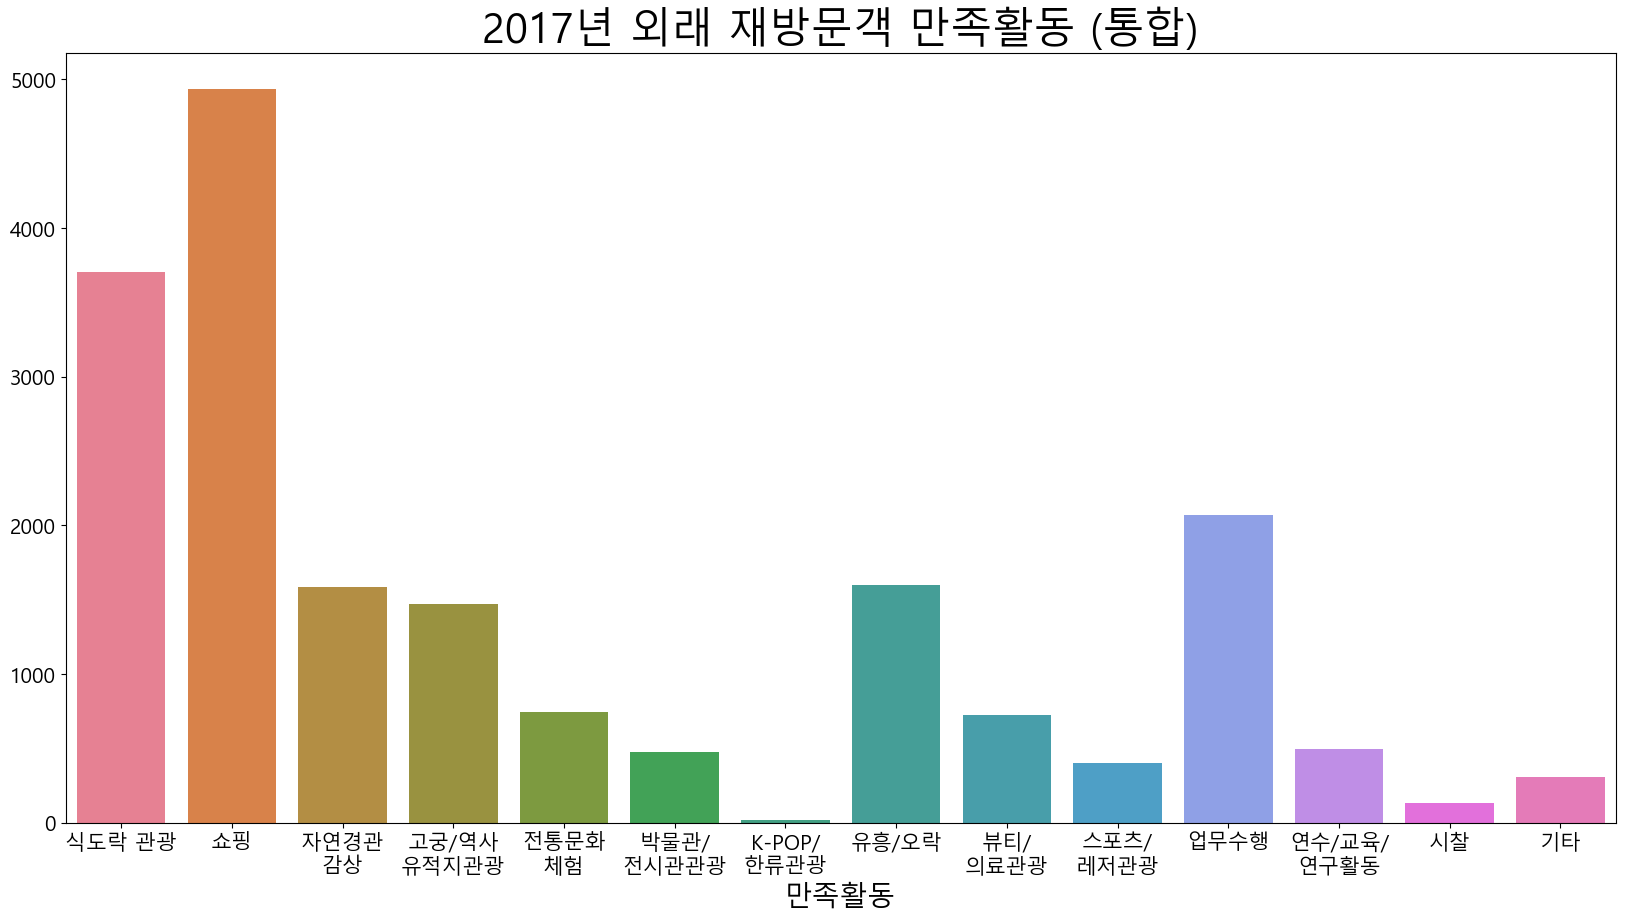

In [14]:
# 만족활동 리스트로 뽑기
list_12, list_22, list_32 = df17_2['Q9_2A1'].tolist(), df17_2['Q9_2A2'].tolist(), df17_2['Q9_2A3'].tolist()
list17_1tot = []
list17_1tot.extend(list_12)
list17_1tot.extend(list_22)
list17_1tot.extend(list_32)

# 위 리스트들로 새 데이터 프레임 생성
df17_21temp = pd.DataFrame()
df17_21temp['만족활동'] = list17_1tot
df17_21temp['순위'] = list17_ctot

# 만족활동 변수값 순으로 오름차순 정렬
df17_21temp = df17_21temp.iloc[df17_21temp.sort_values(by = ['만족활동', '순위']).index, :].reset_index(drop = True)

# 만족활동 변수값 변경
df17_21temp['만족활동'] = df17_21temp['만족활동'].replace(1.0, '식도락 관광')
df17_21temp['만족활동'] = df17_21temp['만족활동'].replace(2.0, '쇼핑')
df17_21temp['만족활동'] = df17_21temp['만족활동'].replace(3.0, '자연경관\n감상')
df17_21temp['만족활동'] = df17_21temp['만족활동'].replace(4.0, '고궁/역사\n유적지관광')
df17_21temp['만족활동'] = df17_21temp['만족활동'].replace(5.0, '전통문화\n체험')
df17_21temp['만족활동'] = df17_21temp['만족활동'].replace(6.0, '박물관/\n전시관관광')
df17_21temp['만족활동'] = df17_21temp['만족활동'].replace(7.0, 'K-POP/\n한류관광')
df17_21temp['만족활동'] = df17_21temp['만족활동'].replace(8.0, '유흥/오락')
df17_21temp['만족활동'] = df17_21temp['만족활동'].replace(9.0, '뷰티/\n의료관광')
df17_21temp['만족활동'] = df17_21temp['만족활동'].replace(10.0, '스포츠/\n레저관광')
df17_21temp['만족활동'] = df17_21temp['만족활동'].replace(11.0, '업무수행')
df17_21temp['만족활동'] = df17_21temp['만족활동'].replace(12.0, '연수/교육/\n연구활동')
df17_21temp['만족활동'] = df17_21temp['만족활동'].replace(13.0, '시찰')
df17_21temp['만족활동'] = df17_21temp['만족활동'].replace(14.0, '기타')

# 시각화
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2017년 외래 재방문객 만족활동 (통합)', fontdict = {'fontsize': 30})
sns.countplot(x = '만족활동', palette = 'husl', data = df17_21temp)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('만족활동', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.show()

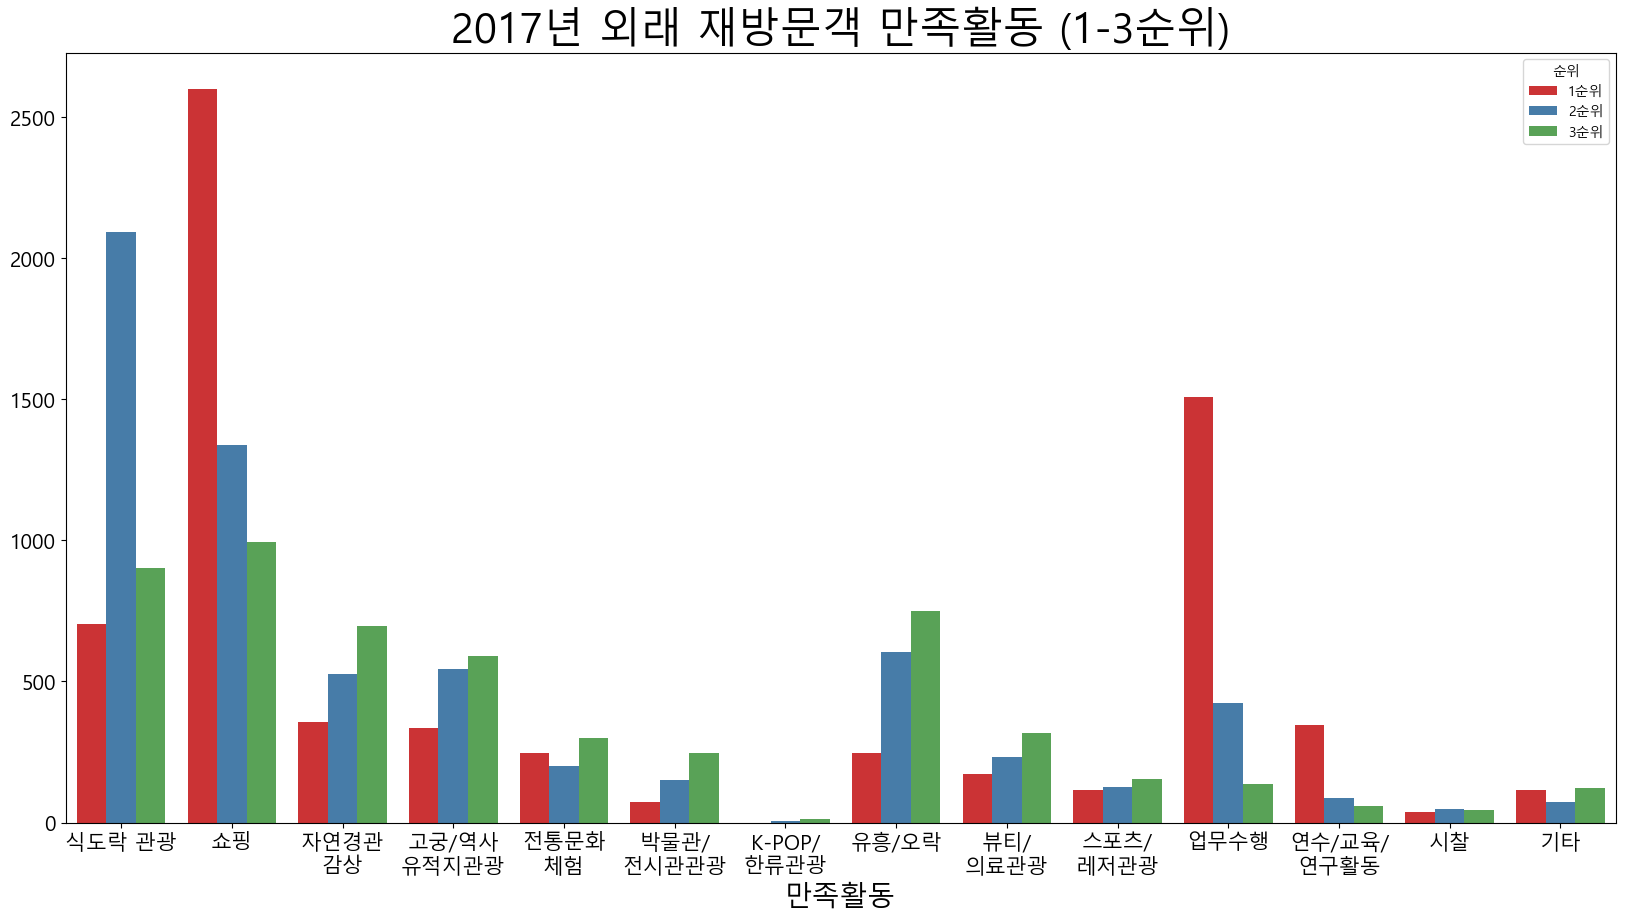

In [15]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2017년 외래 재방문객 만족활동 (1-3순위)', fontdict = {'fontsize': 30})
sns.countplot(x = '만족활동', hue = '순위', palette = 'Set1', data = df17_21temp)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('만족활동', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.show()

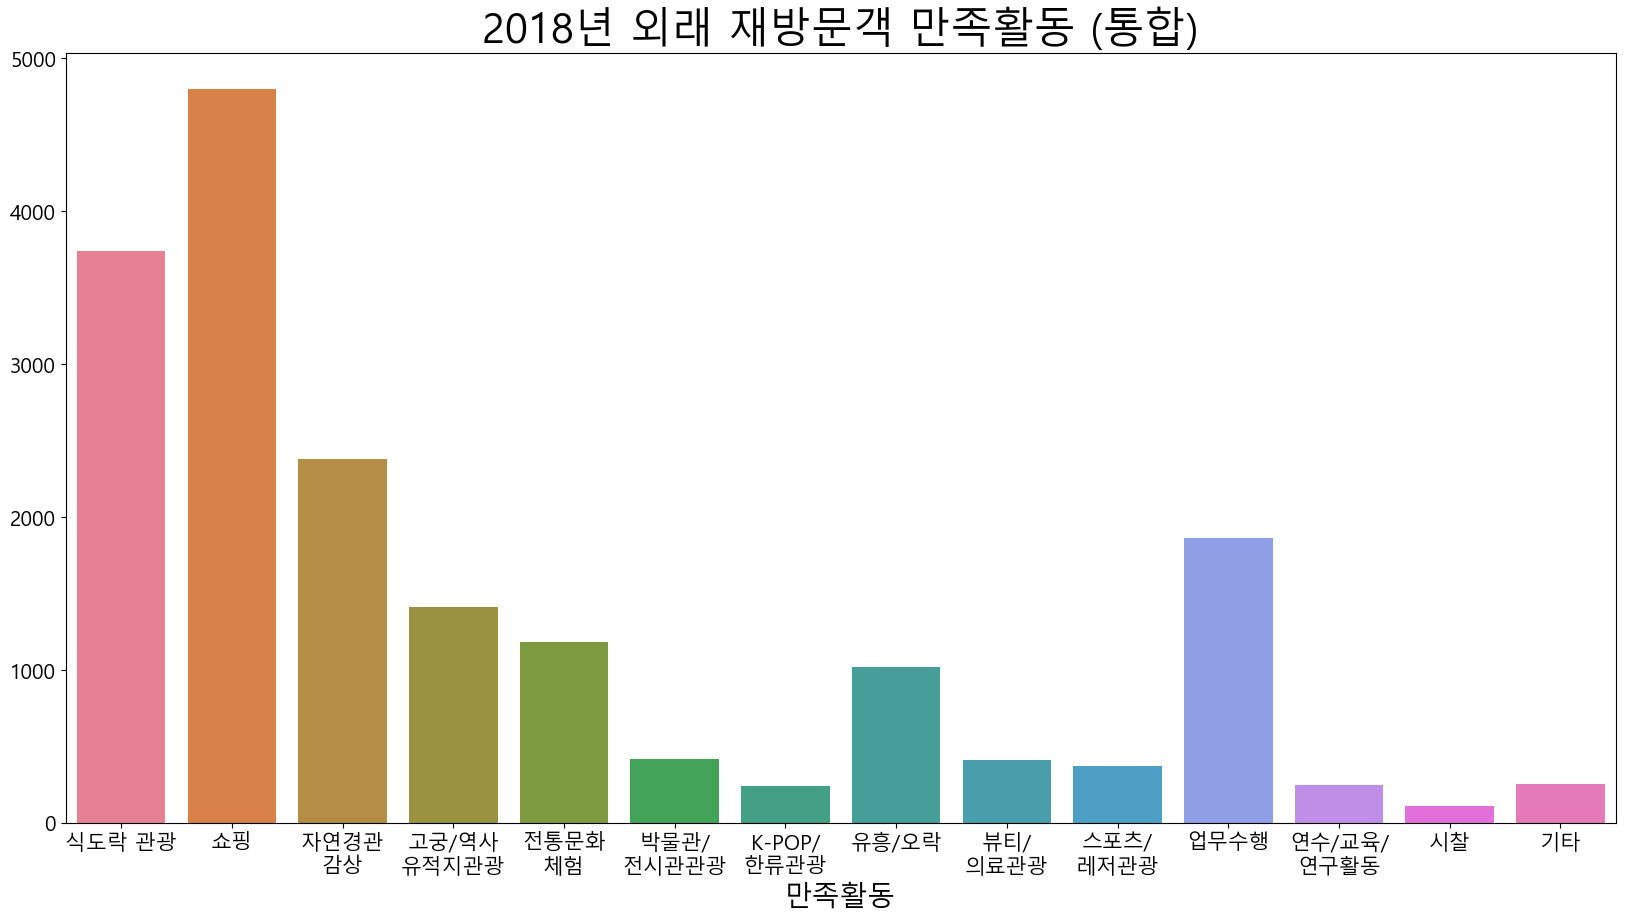

In [16]:
# 만족활동 리스트로 뽑기
list_13, list_23, list_33 = df18_2['Q9_2A1'].tolist(), df18_2['Q9_2A2'].tolist(), df18_2['Q9_2A3'].tolist()
list18_1tot = []
list18_1tot.extend(list_13)
list18_1tot.extend(list_23)
list18_1tot.extend(list_33)

# 위 리스트들로 새 데이터 프레임 생성
df18_21temp = pd.DataFrame()
df18_21temp['만족활동'] = list18_1tot
df18_21temp['순위'] = list18_ctot

# 만족활동 변수값 순으로 오름차순 정렬
df18_21temp = df18_21temp.iloc[df18_21temp.sort_values(by = ['만족활동', '순위']).index, :].reset_index(drop = True)

# 만족활동 변수값 변경
df18_21temp['만족활동'] = df18_21temp['만족활동'].replace(1.0, '식도락 관광')
df18_21temp['만족활동'] = df18_21temp['만족활동'].replace(2.0, '쇼핑')
df18_21temp['만족활동'] = df18_21temp['만족활동'].replace(3.0, '자연경관\n감상')
df18_21temp['만족활동'] = df18_21temp['만족활동'].replace(4.0, '고궁/역사\n유적지관광')
df18_21temp['만족활동'] = df18_21temp['만족활동'].replace(5.0, '전통문화\n체험')
df18_21temp['만족활동'] = df18_21temp['만족활동'].replace(6.0, '박물관/\n전시관관광')
df18_21temp['만족활동'] = df18_21temp['만족활동'].replace(7.0, 'K-POP/\n한류관광')
df18_21temp['만족활동'] = df18_21temp['만족활동'].replace(8.0, '유흥/오락')
df18_21temp['만족활동'] = df18_21temp['만족활동'].replace(9.0, '뷰티/\n의료관광')
df18_21temp['만족활동'] = df18_21temp['만족활동'].replace(10.0, '스포츠/\n레저관광')
df18_21temp['만족활동'] = df18_21temp['만족활동'].replace(11.0, '업무수행')
df18_21temp['만족활동'] = df18_21temp['만족활동'].replace(12.0, '연수/교육/\n연구활동')
df18_21temp['만족활동'] = df18_21temp['만족활동'].replace(13.0, '시찰')
df18_21temp['만족활동'] = df18_21temp['만족활동'].replace(14.0, '기타')

# 시각화
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2018년 외래 재방문객 만족활동 (통합)', fontdict = {'fontsize': 30})
sns.countplot(x = '만족활동', palette = 'husl', data = df18_21temp)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('만족활동', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.show()

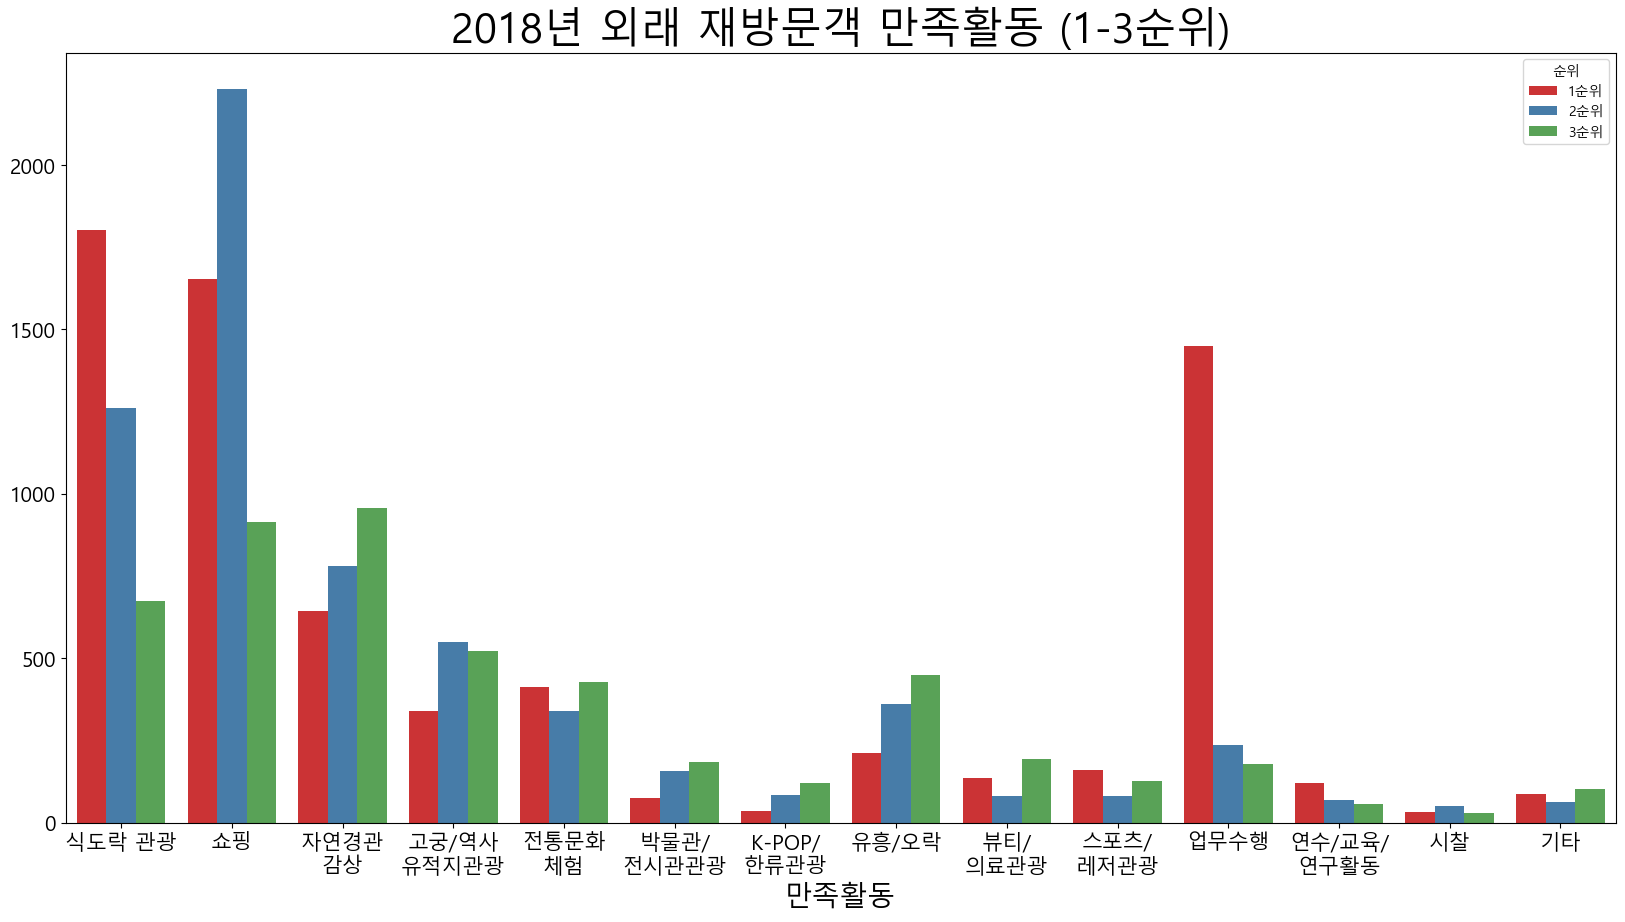

In [17]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2018년 외래 재방문객 만족활동 (1-3순위)', fontdict = {'fontsize': 30})
sns.countplot(x = '만족활동', hue = '순위', palette = 'Set1', data = df18_21temp)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('만족활동', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.show()

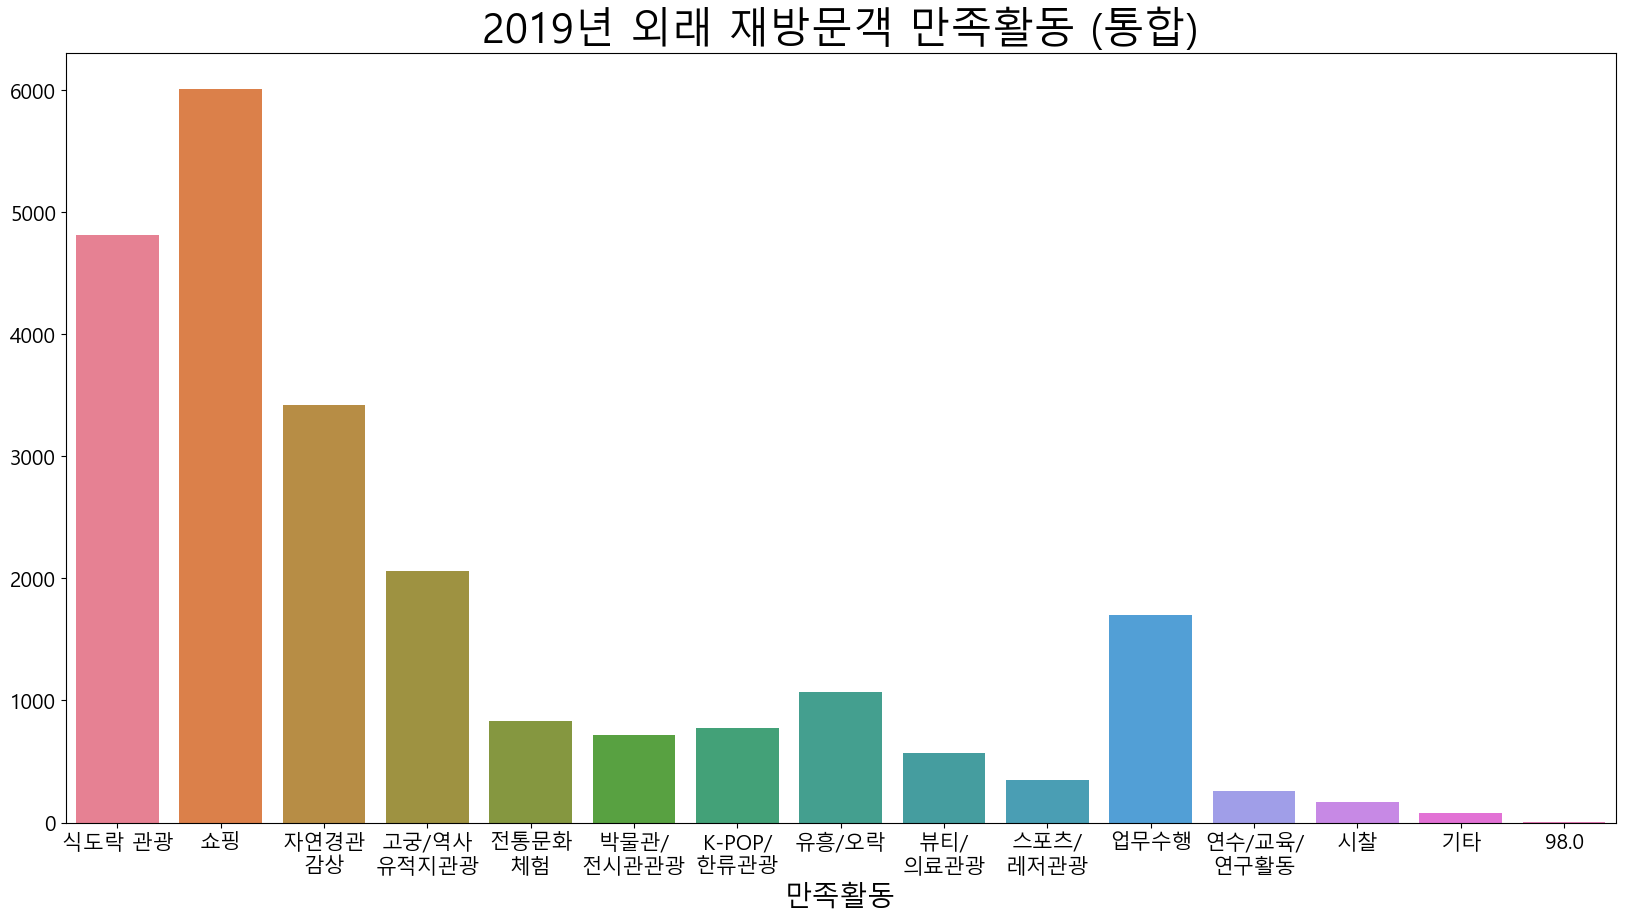

In [18]:
# 만족활동 리스트로 뽑기
list_14, list_24, list_34 = df19_2['Q9_2A1'].tolist(), df19_2['Q9_2A2'].tolist(), df19_2['Q9_2A3'].tolist()
list19_1tot = []
list19_1tot.extend(list_14)
list19_1tot.extend(list_24)
list19_1tot.extend(list_34)

# 위 리스트들로 새 데이터 프레임 생성
df19_21temp = pd.DataFrame()
df19_21temp['만족활동'] = list19_1tot
df19_21temp['순위'] = list19_ctot

# 만족활동 변수값 순으로 오름차순 정렬
df19_21temp = df19_21temp.iloc[df19_21temp.sort_values(by = ['만족활동', '순위']).index, :].reset_index(drop = True)

# 만족활동 변수값 변경
df19_21temp['만족활동'] = df19_21temp['만족활동'].replace(1.0, '식도락 관광')
df19_21temp['만족활동'] = df19_21temp['만족활동'].replace(2.0, '쇼핑')
df19_21temp['만족활동'] = df19_21temp['만족활동'].replace(3.0, '자연경관\n감상')
df19_21temp['만족활동'] = df19_21temp['만족활동'].replace(4.0, '고궁/역사\n유적지관광')
df19_21temp['만족활동'] = df19_21temp['만족활동'].replace(5.0, '전통문화\n체험')
df19_21temp['만족활동'] = df19_21temp['만족활동'].replace(6.0, '박물관/\n전시관관광')
df19_21temp['만족활동'] = df19_21temp['만족활동'].replace(7.0, 'K-POP/\n한류관광')
df19_21temp['만족활동'] = df19_21temp['만족활동'].replace(8.0, '유흥/오락')
df19_21temp['만족활동'] = df19_21temp['만족활동'].replace(9.0, '뷰티/\n의료관광')
df19_21temp['만족활동'] = df19_21temp['만족활동'].replace(10.0, '스포츠/\n레저관광')
df19_21temp['만족활동'] = df19_21temp['만족활동'].replace(11.0, '업무수행')
df19_21temp['만족활동'] = df19_21temp['만족활동'].replace(12.0, '연수/교육/\n연구활동')
df19_21temp['만족활동'] = df19_21temp['만족활동'].replace(13.0, '시찰')
df19_21temp['만족활동'] = df19_21temp['만족활동'].replace(14.0, '기타')

# 시각화
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2019년 외래 재방문객 만족활동 (통합)', fontdict = {'fontsize': 30})
sns.countplot(x = '만족활동', palette = 'husl', data = df19_21temp)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('만족활동', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.show()

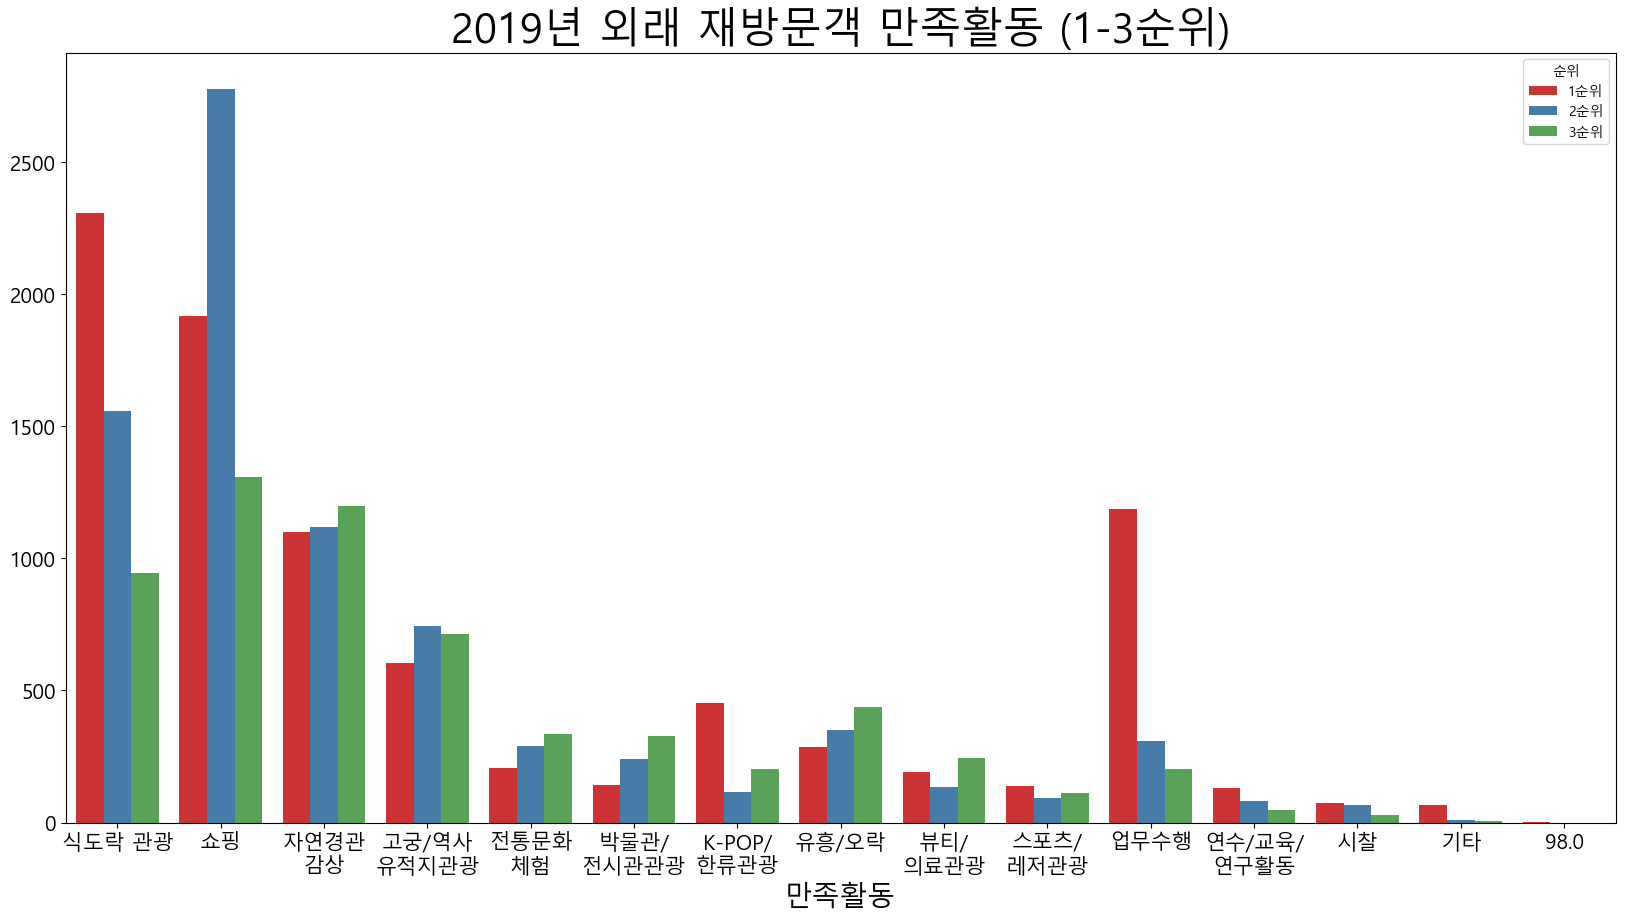

In [19]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2019년 외래 재방문객 만족활동 (1-3순위)', fontdict = {'fontsize': 30})
sns.countplot(x = '만족활동', hue = '순위', palette = 'Set1', data = df19_21temp)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('만족활동', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.show()

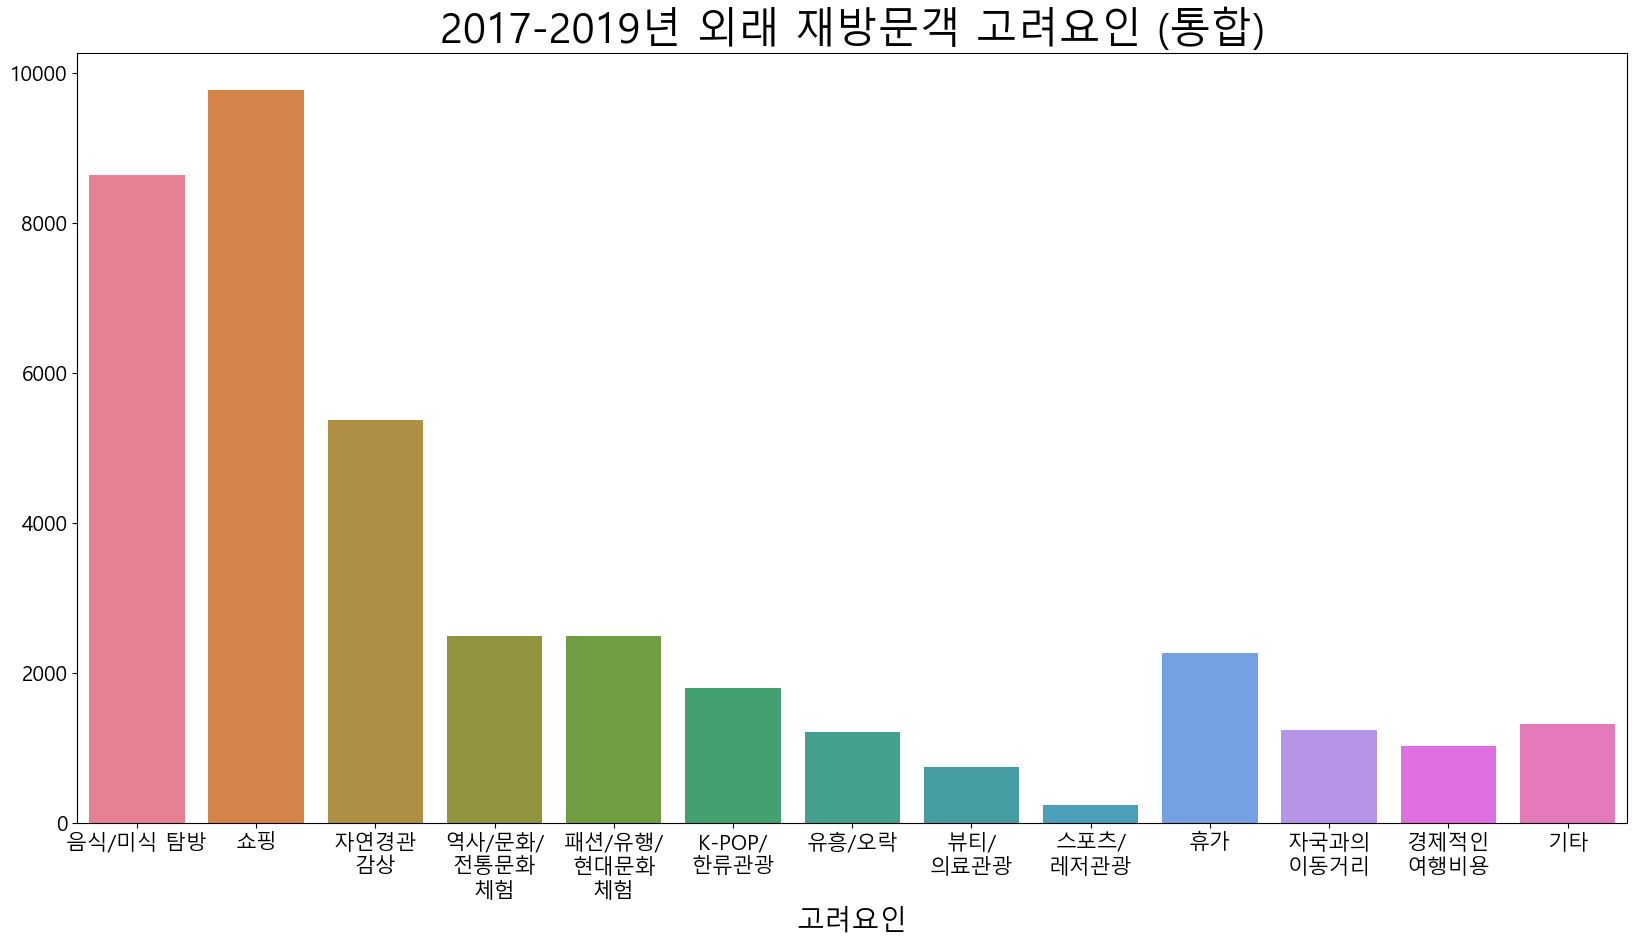

In [20]:
# 고려요인 리스트로 뽑기
list_15, list_25, list_35 = df_2['Q5_2A1'].tolist(), df_2['Q5_2A2'].tolist(), df_2['Q5_2A3'].tolist()
list_2tot = []
list_2tot.extend(list_15)
list_2tot.extend(list_25)
list_2tot.extend(list_35)

# 위 리스트들로 새 데이터 프레임 생성
df_22temp = pd.DataFrame()
df_22temp['고려요인'] = list_2tot
df_22temp['순위'] = list_ctot

# 고려요인 변수값 순으로 오름차순 정렬
df_22temp = df_22temp.iloc[df_22temp.sort_values(by = ['고려요인', '순위']).index, :].reset_index(drop = True)

# 고려요인 변수값 변경
df_22temp['고려요인'] = df_22temp['고려요인'].replace(1.0, '음식/미식 탐방')
df_22temp['고려요인'] = df_22temp['고려요인'].replace(2.0, '쇼핑')
df_22temp['고려요인'] = df_22temp['고려요인'].replace(3.0, '자연경관\n감상')
df_22temp['고려요인'] = df_22temp['고려요인'].replace(4.0, '역사/문화/\n전통문화\n체험')
df_22temp['고려요인'] = df_22temp['고려요인'].replace(5.0, '패션/유행/\n현대문화\n체험')
df_22temp['고려요인'] = df_22temp['고려요인'].replace(6.0, 'K-POP/\n한류관광')
df_22temp['고려요인'] = df_22temp['고려요인'].replace(7.0, '유흥/오락')
df_22temp['고려요인'] = df_22temp['고려요인'].replace(8.0, '뷰티/\n의료관광')
df_22temp['고려요인'] = df_22temp['고려요인'].replace(9.0, '스포츠/\n레저관광')
df_22temp['고려요인'] = df_22temp['고려요인'].replace(10.0, '휴가')
df_22temp['고려요인'] = df_22temp['고려요인'].replace(11.0, '자국과의\n이동거리')
df_22temp['고려요인'] = df_22temp['고려요인'].replace(12.0, '경제적인\n여행비용')
df_22temp['고려요인'] = df_22temp['고려요인'].replace(13.0, '기타')

# 시각화
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2017-2019년 외래 재방문객 고려요인 (통합)', fontdict = {'fontsize': 30})
sns.countplot(x = '고려요인', palette = 'husl', data = df_22temp)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('고려요인', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.show()

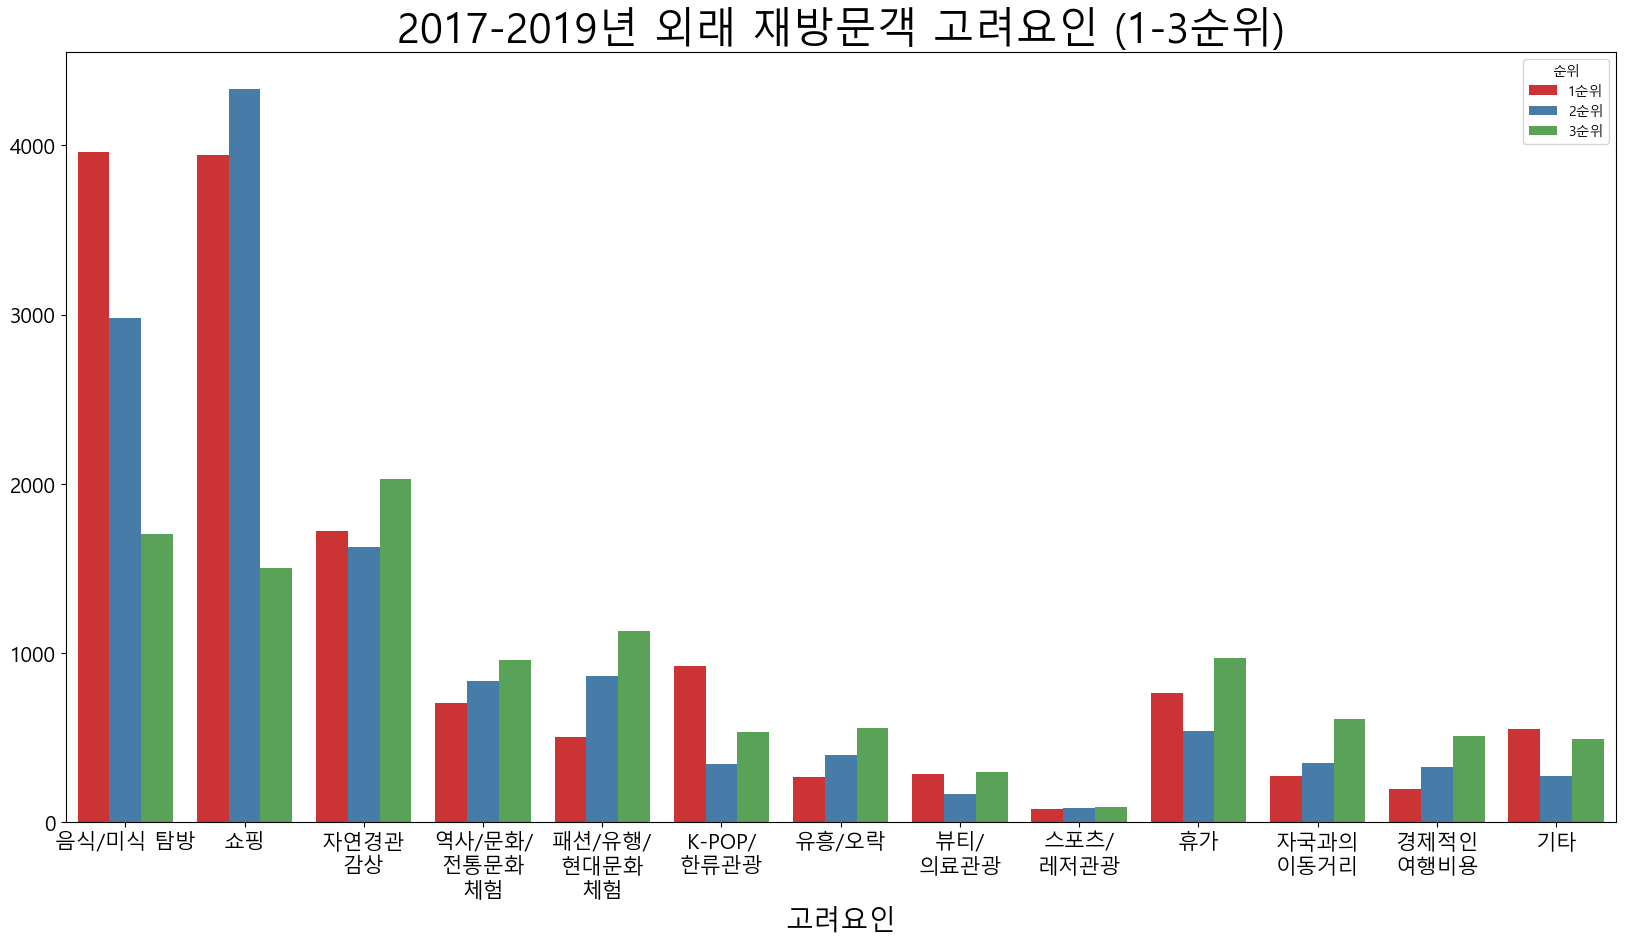

In [21]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2017-2019년 외래 재방문객 고려요인 (1-3순위)', fontdict = {'fontsize': 30})
sns.countplot(x = '고려요인', hue = '순위', palette = 'Set1', data = df_22temp)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('고려요인', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.show()

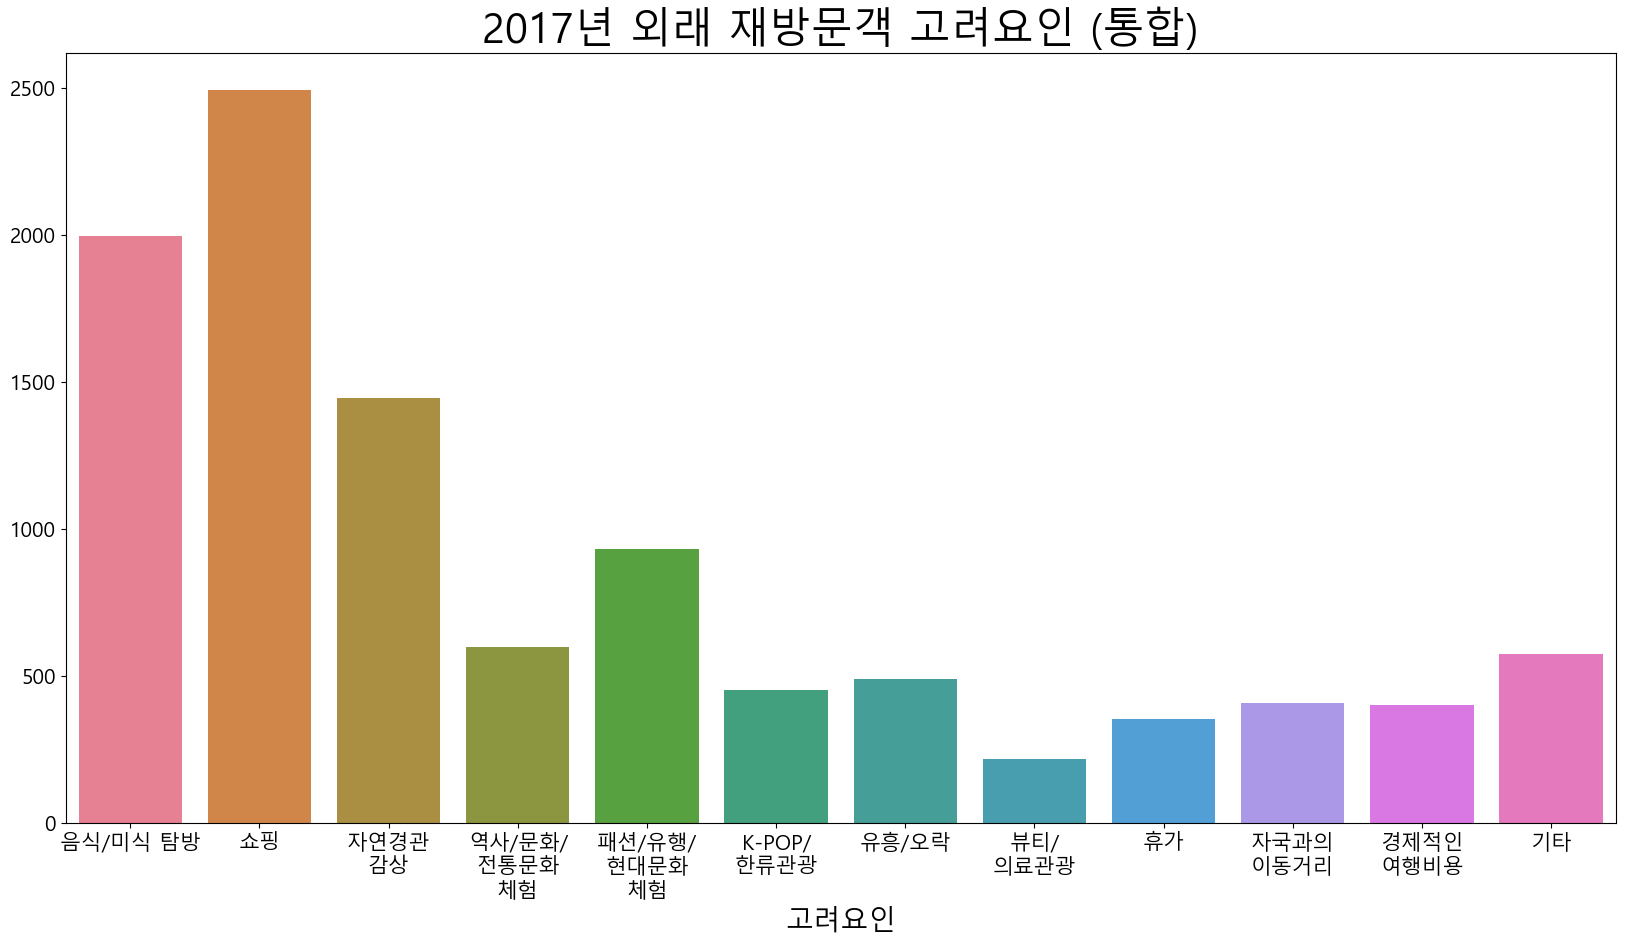

In [22]:
# 고려요인 리스트로 뽑기
list_16, list_26, list_36 = df17_2['Q5_2A1'].tolist(), df17_2['Q5_2A2'].tolist(), df17_2['Q5_2A3'].tolist()
list17_2tot = []
list17_2tot.extend(list_16)
list17_2tot.extend(list_26)
list17_2tot.extend(list_36)

# 위 리스트들로 새 데이터 프레임 생성
df17_22temp = pd.DataFrame()
df17_22temp['고려요인'] = list17_2tot
df17_22temp['순위'] = list17_ctot

# 고려요인 변수값 순으로 오름차순 정렬
df17_22temp = df17_22temp.iloc[df17_22temp.sort_values(by = ['고려요인', '순위']).index, :].reset_index(drop = True)

# 고려요인 변수값 변경
df17_22temp['고려요인'] = df17_22temp['고려요인'].replace(1.0, '음식/미식 탐방')
df17_22temp['고려요인'] = df17_22temp['고려요인'].replace(2.0, '쇼핑')
df17_22temp['고려요인'] = df17_22temp['고려요인'].replace(3.0, '자연경관\n감상')
df17_22temp['고려요인'] = df17_22temp['고려요인'].replace(4.0, '역사/문화/\n전통문화\n체험')
df17_22temp['고려요인'] = df17_22temp['고려요인'].replace(5.0, '패션/유행/\n현대문화\n체험')
df17_22temp['고려요인'] = df17_22temp['고려요인'].replace(6.0, 'K-POP/\n한류관광')
df17_22temp['고려요인'] = df17_22temp['고려요인'].replace(7.0, '유흥/오락')
df17_22temp['고려요인'] = df17_22temp['고려요인'].replace(8.0, '뷰티/\n의료관광')
df17_22temp['고려요인'] = df17_22temp['고려요인'].replace(9.0, '스포츠/\n레저관광')
df17_22temp['고려요인'] = df17_22temp['고려요인'].replace(10.0, '휴가')
df17_22temp['고려요인'] = df17_22temp['고려요인'].replace(11.0, '자국과의\n이동거리')
df17_22temp['고려요인'] = df17_22temp['고려요인'].replace(12.0, '경제적인\n여행비용')
df17_22temp['고려요인'] = df17_22temp['고려요인'].replace(13.0, '기타')

# 시각화
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2017년 외래 재방문객 고려요인 (통합)', fontdict = {'fontsize': 30})
sns.countplot(x = '고려요인', palette = 'husl', data = df17_22temp)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('고려요인', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.show()

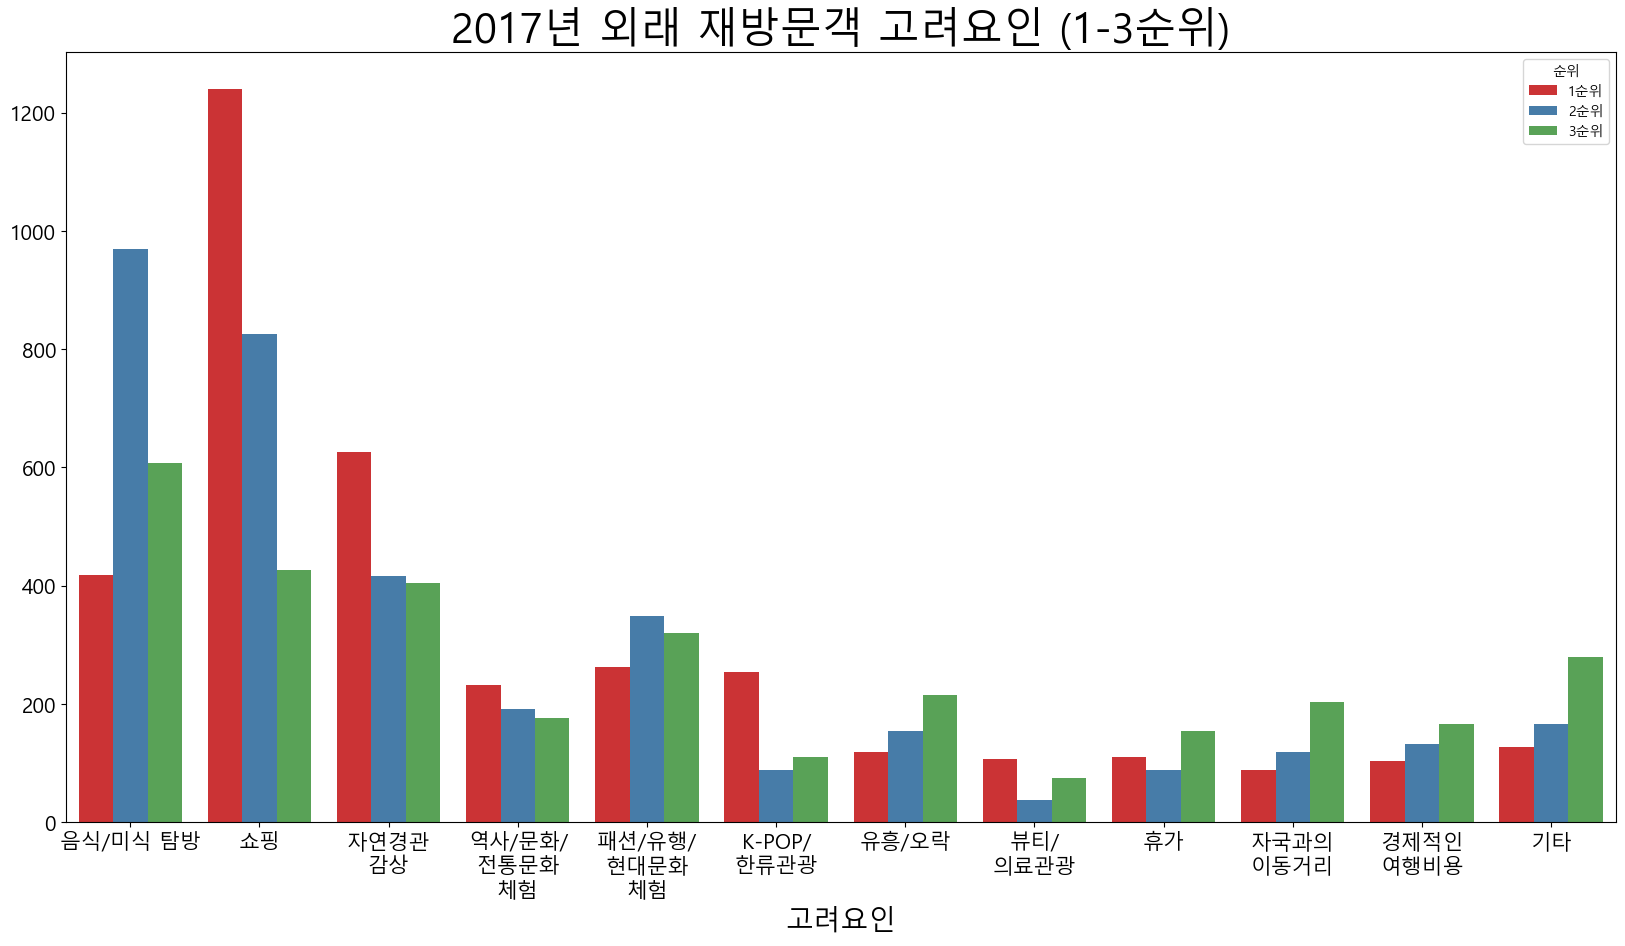

In [23]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2017년 외래 재방문객 고려요인 (1-3순위)', fontdict = {'fontsize': 30})
sns.countplot(x = '고려요인', hue = '순위', palette = 'Set1', data = df17_22temp)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('고려요인', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.show()

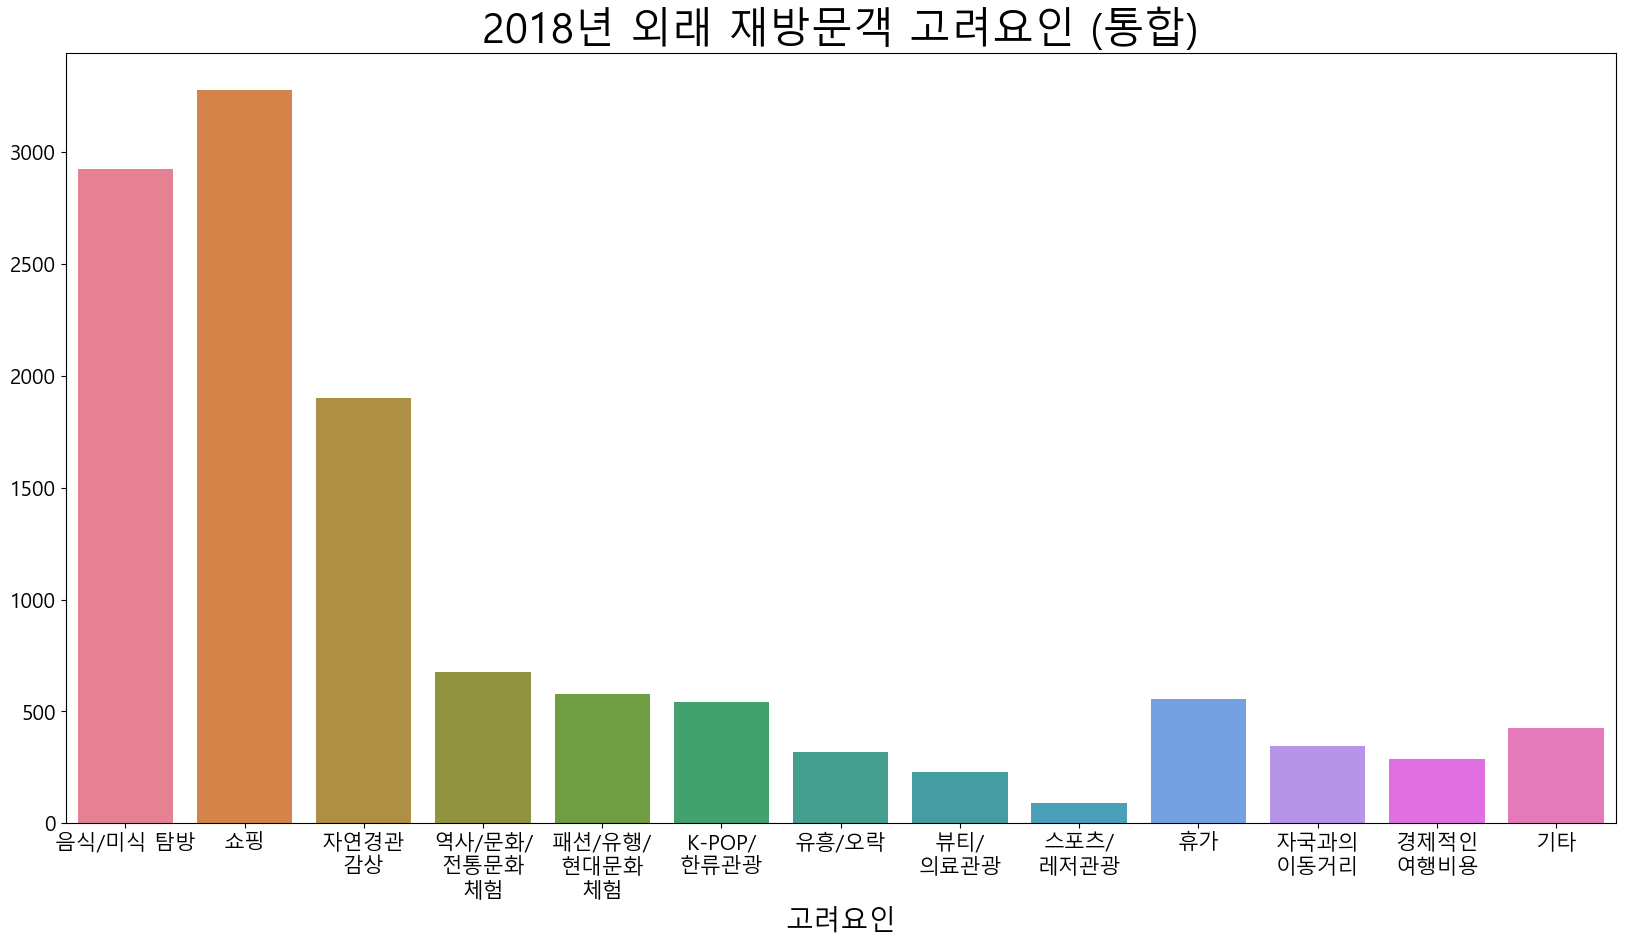

In [24]:
# 고려요인 리스트로 뽑기
list_17, list_27, list_37 = df18_2['Q5_2A1'].tolist(), df18_2['Q5_2A2'].tolist(), df18_2['Q5_2A3'].tolist()
list18_2tot = []
list18_2tot.extend(list_17)
list18_2tot.extend(list_27)
list18_2tot.extend(list_37)

# 위 리스트들로 새 데이터 프레임 생성
df18_22temp = pd.DataFrame()
df18_22temp['고려요인'] = list18_2tot
df18_22temp['순위'] = list18_ctot

# 고려요인 변수값 순으로 오름차순 정렬
df18_22temp = df18_22temp.iloc[df18_22temp.sort_values(by = ['고려요인', '순위']).index, :].reset_index(drop = True)

# 고려요인 변수값 변경
df18_22temp['고려요인'] = df18_22temp['고려요인'].replace(1.0, '음식/미식 탐방')                 
df18_22temp['고려요인'] = df18_22temp['고려요인'].replace(2.0, '쇼핑')                         
df18_22temp['고려요인'] = df18_22temp['고려요인'].replace(3.0, '자연경관\n감상')                
df18_22temp['고려요인'] = df18_22temp['고려요인'].replace(4.0, '역사/문화/\n전통문화\n체험')
df18_22temp['고려요인'] = df18_22temp['고려요인'].replace(5.0, '패션/유행/\n현대문화\n체험')
df18_22temp['고려요인'] = df18_22temp['고려요인'].replace(6.0, 'K-POP/\n한류관광')            
df18_22temp['고려요인'] = df18_22temp['고려요인'].replace(7.0, '유흥/오락')                
df18_22temp['고려요인'] = df18_22temp['고려요인'].replace(8.0, '뷰티/\n의료관광')              
df18_22temp['고려요인'] = df18_22temp['고려요인'].replace(9.0, '스포츠/\n레저관광')            
df18_22temp['고려요인'] = df18_22temp['고려요인'].replace(10.0, '휴가')                     
df18_22temp['고려요인'] = df18_22temp['고려요인'].replace(11.0, '자국과의\n이동거리')            
df18_22temp['고려요인'] = df18_22temp['고려요인'].replace(12.0, '경제적인\n여행비용')           
df18_22temp['고려요인'] = df18_22temp['고려요인'].replace(13.0, '기타')                        

# 시각화
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2018년 외래 재방문객 고려요인 (통합)', fontdict = {'fontsize': 30})
sns.countplot(x = '고려요인', palette = 'husl', data = df18_22temp)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('고려요인', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.show()

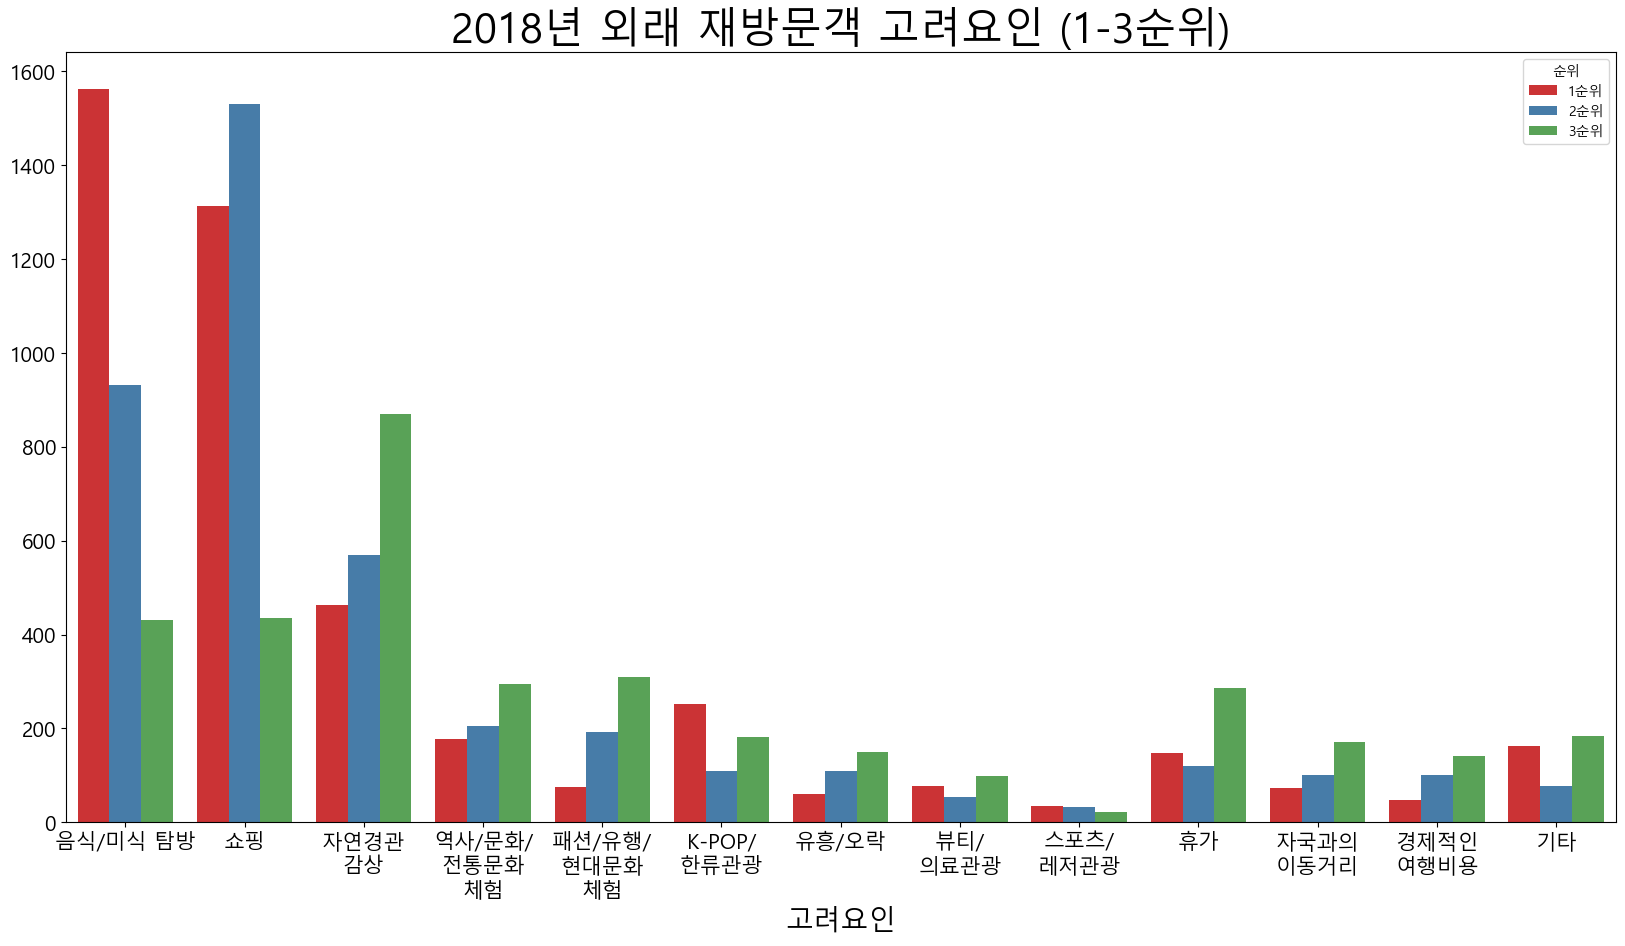

In [25]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2018년 외래 재방문객 고려요인 (1-3순위)', fontdict = {'fontsize': 30})
sns.countplot(x = '고려요인', hue = '순위', palette = 'Set1', data = df18_22temp)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('고려요인', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.show()

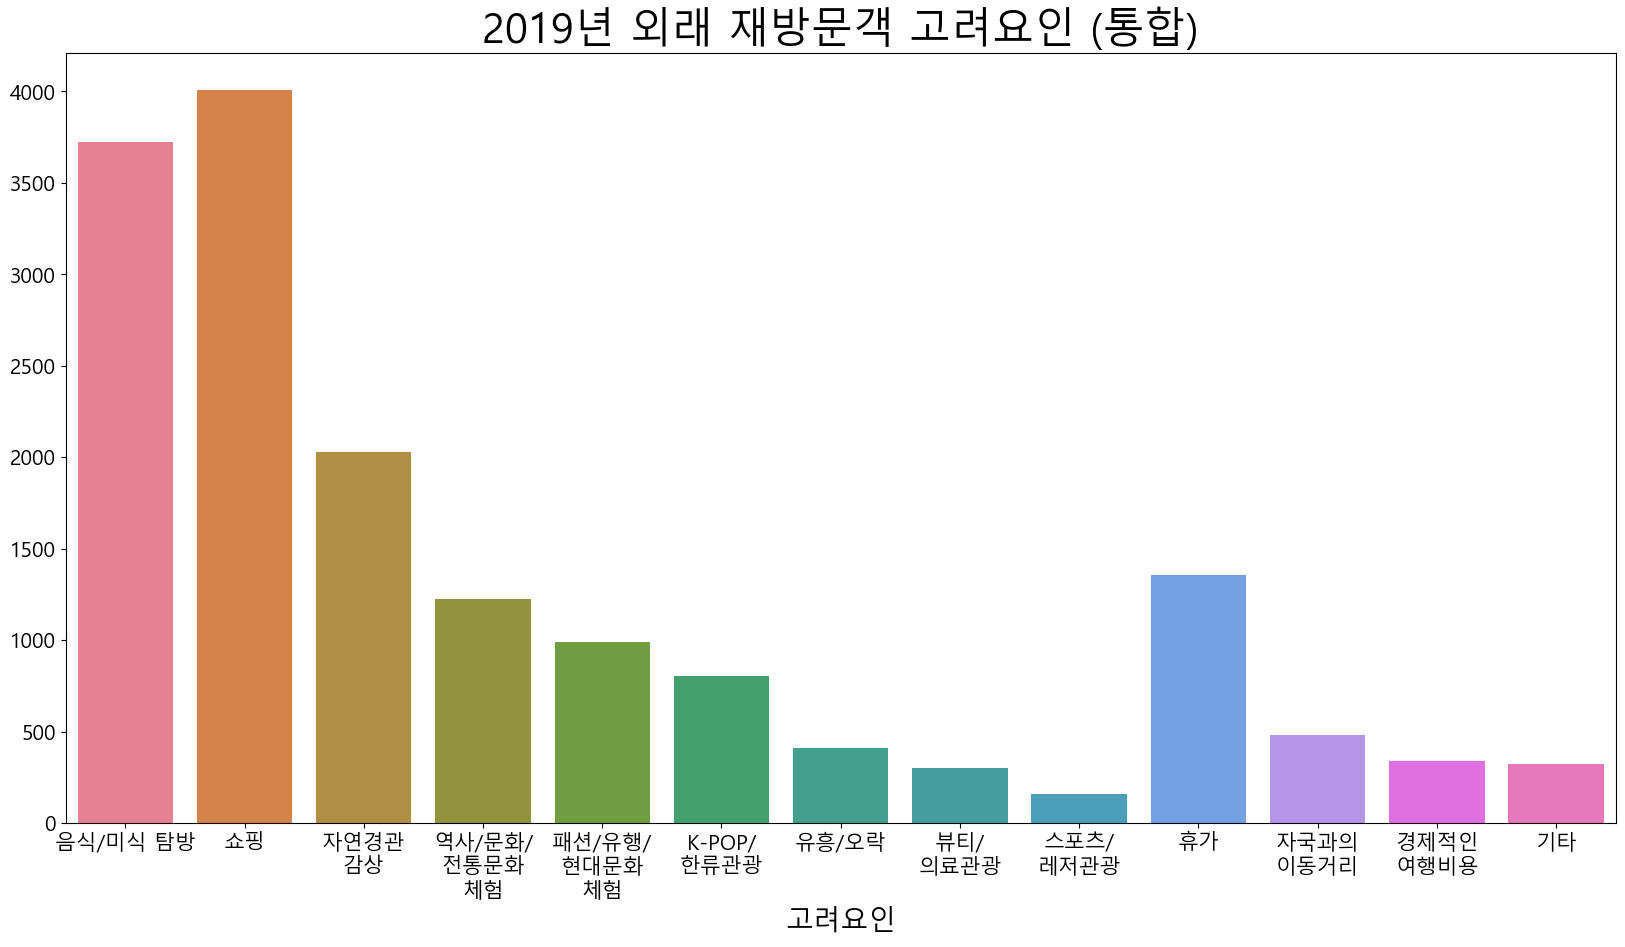

In [26]:
# 고려요인 리스트로 뽑기
list_18, list_28, list_38 = df19_2['Q5_2A1'].tolist(), df19_2['Q5_2A2'].tolist(), df19_2['Q5_2A3'].tolist()
list19_2tot = []
list19_2tot.extend(list_18)
list19_2tot.extend(list_28)
list19_2tot.extend(list_38)

# 위 리스트들로 새 데이터 프레임 생성
df19_22temp = pd.DataFrame()
df19_22temp['고려요인'] = list19_2tot
df19_22temp['순위'] = list19_ctot

# 고려요인 변수값 순으로 오름차순 정렬
df19_22temp = df19_22temp.iloc[df19_22temp.sort_values(by = ['고려요인', '순위']).index, :].reset_index(drop = True)

# 고려요인 변수값 변경
df19_22temp['고려요인'] = df19_22temp['고려요인'].replace(1.0, '음식/미식 탐방')
df19_22temp['고려요인'] = df19_22temp['고려요인'].replace(2.0, '쇼핑')
df19_22temp['고려요인'] = df19_22temp['고려요인'].replace(3.0, '자연경관\n감상')
df19_22temp['고려요인'] = df19_22temp['고려요인'].replace(4.0, '역사/문화/\n전통문화\n체험')
df19_22temp['고려요인'] = df19_22temp['고려요인'].replace(5.0, '패션/유행/\n현대문화\n체험')
df19_22temp['고려요인'] = df19_22temp['고려요인'].replace(6.0, 'K-POP/\n한류관광')
df19_22temp['고려요인'] = df19_22temp['고려요인'].replace(7.0, '유흥/오락')
df19_22temp['고려요인'] = df19_22temp['고려요인'].replace(8.0, '뷰티/\n의료관광')
df19_22temp['고려요인'] = df19_22temp['고려요인'].replace(9.0, '스포츠/\n레저관광')
df19_22temp['고려요인'] = df19_22temp['고려요인'].replace(10.0, '휴가')
df19_22temp['고려요인'] = df19_22temp['고려요인'].replace(11.0, '자국과의\n이동거리')
df19_22temp['고려요인'] = df19_22temp['고려요인'].replace(12.0, '경제적인\n여행비용')
df19_22temp['고려요인'] = df19_22temp['고려요인'].replace(13.0, '기타')

# 시각화
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2019년 외래 재방문객 고려요인 (통합)', fontdict = {'fontsize': 30})
sns.countplot(x = '고려요인', palette = 'husl', data = df19_22temp)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('고려요인', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.show()

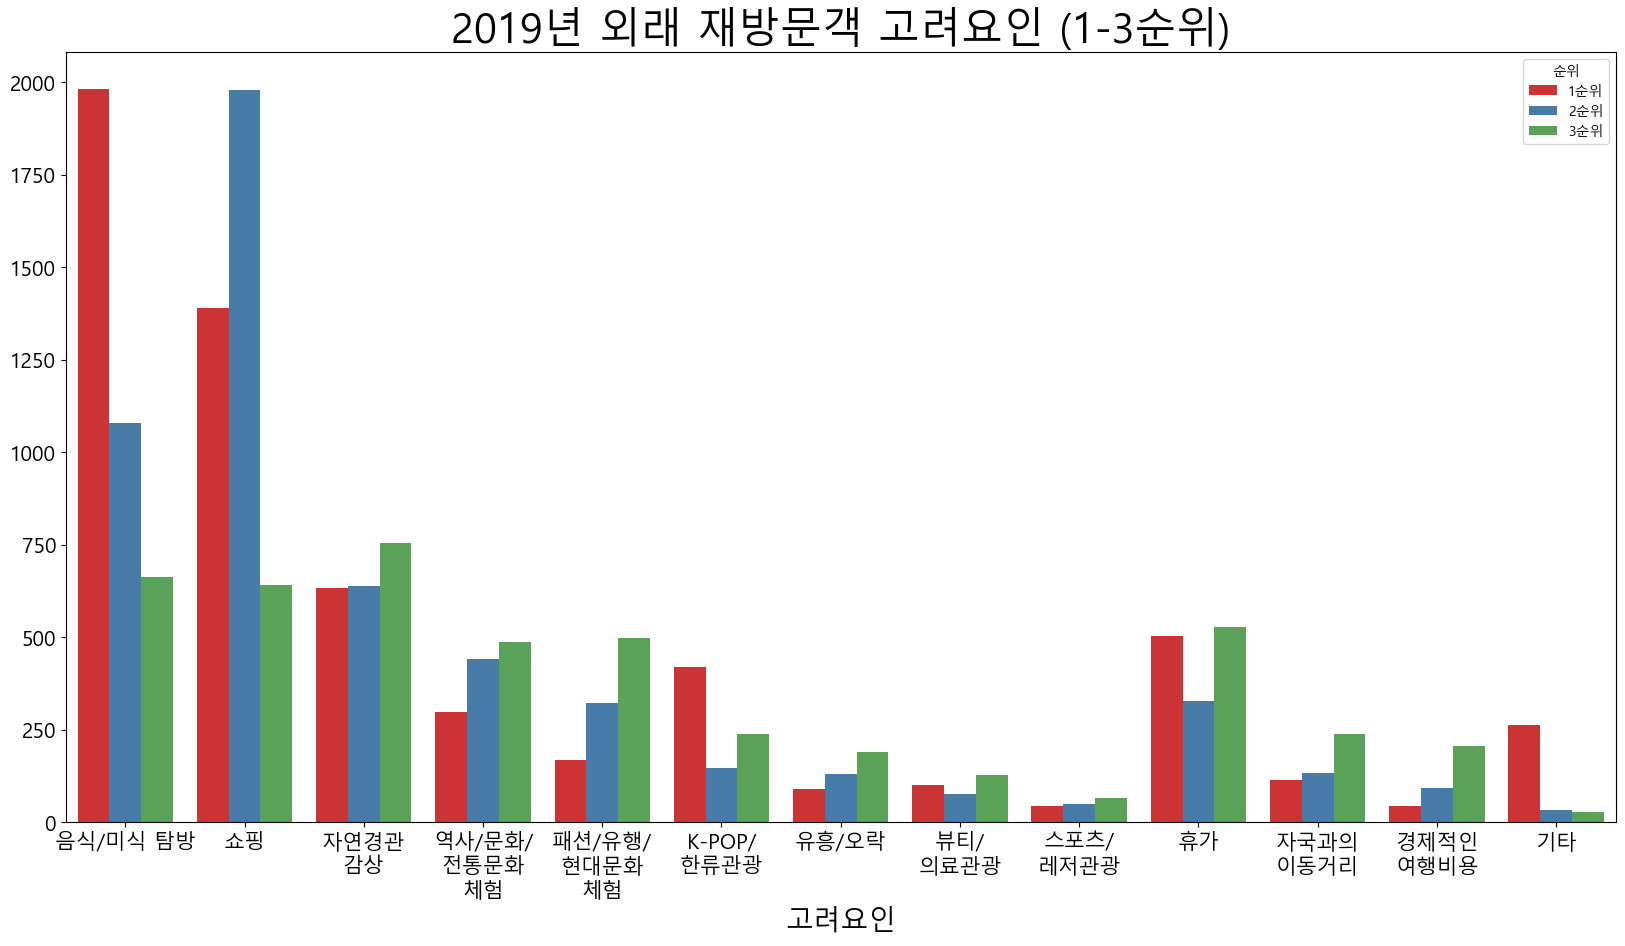

In [27]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2019년 외래 재방문객 고려요인 (1-3순위)', fontdict = {'fontsize': 30})
sns.countplot(x = '고려요인', hue = '순위', palette = 'Set1', data = df19_22temp)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('고려요인', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.show()

In [28]:
# 재방문 예측 데이터 만들기
df_rfm = pd.DataFrame()

# 예측 라벨 만들기
p_list = ['전혀 그렇지 않다', '그렇지 않다', '보통', '그렇다', '매우 그렇다']
r_labels = range(1, 6)

# 예측 데이터 만들기
cut = pd.cut(df_1['Q1'], bins = [0, 1, 3, 5, 10, 300])
df_rfm['최근방문'] = df_1['D_YEAR']
df_rfm['최근방문'] = df_rfm['최근방문'].replace({'2017' : 1, '2018' : 3, '2019' : 5})
df_rfm['방문횟수'] = pd.cut(df_1['Q1'], bins = [0, 1, 3, 5, 10, 300], labels = r_labels)
df_rfm['구매금액'] = pd.cut(df_1['Q14_1T'], bins = [0, 2500, 5000, 7500, 10000, df_1['Q14_1T'].max()], labels = r_labels)
df_rfm['최근방문'] = df_rfm['최근방문'].astype(int)
df_rfm['방문횟수'] = df_rfm['방문횟수'].astype(int)
df_rfm['구매금액'] = df_rfm['구매금액'].astype(int)
df_rfm['점수'] = df_rfm['최근방문'] + df_rfm['방문횟수'] + df_rfm['구매금액']
df_rfm['재방문예측'] = pd.cut(df_rfm['점수'], bins = 5, labels = r_labels)
df_rfm['범주'] = '재방문예측'

df_rfm2=df_rfm.copy()
df_rfm2['재방문예측'] = df_1['Q16']
df_rfm2['범주'] = '재방문의향'

df_rfm3 = pd.concat([df_rfm, df_rfm2]).reset_index(drop = True)

# 선그래프 그리기 위한 피벗테이블 데이터 만들기
pt_rfm = pd.pivot_table(df_rfm3, values = '점수', index = '재방문예측', columns = '범주', aggfunc = 'mean')

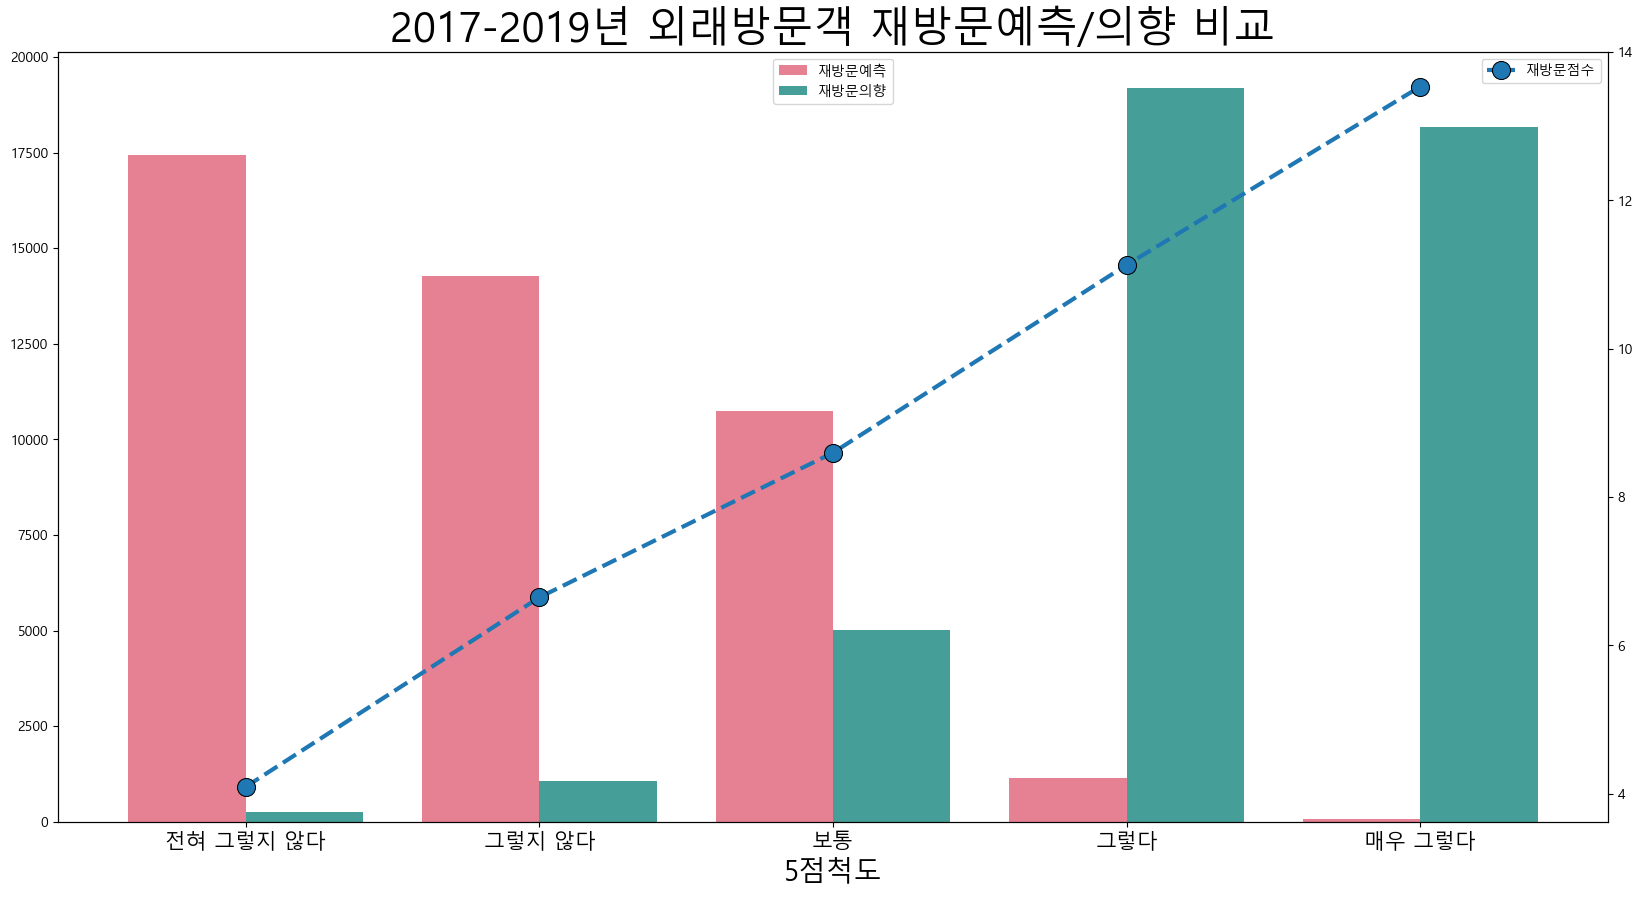

In [29]:
# 재방문예측 의향 시각화
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2017-2019년 외래방문객 재방문예측/의향 비교', fontdict = {'fontsize': 30})
ax = sns.countplot(x = '재방문예측', hue = '범주', palette = 'husl', data = df_rfm3)
ax.set_xticklabels(['전혀 그렇지 않다', '그렇지 않다', '보통', '그렇다', '매우 그렇다'], fontdict = {'fontsize': 15})
plt.xlabel('5점척도', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.legend(loc = 9)
ax2 = ax.twinx()
ax2 = sns.lineplot(x = pt_rfm.index - 1, y = '재방문예측', data = pt_rfm, ax = ax2,
                   marker = 'o', ms = 13, mec = 'black',
                   ls = '--', lw = 3, label = '재방문점수')
plt.legend()
plt.ylabel('')
plt.show()

### c : 색상
### lw : 선굵기
### ls : 선스타일
### marker : 지점 모양
### ms : 마커 사이즈
### mec : 마커 테두리 색
### mew : 마커 테두리 크기
### mfc : 마커 테두리내부 색

# 재방문 예측 인원수와 재방문 의향 인원수의 차이가 크다.
# 재방문 예측 점수를 3 ~ 15점으로 구분 하여 5점척도를 만듦.

In [30]:
# 소비금액 Top2 (쇼핑비, 식음료비) 재방문율 데이터 가공
df_3 = df[['D_GEN', 'D_AGE', 'D_COU1', 'Q1', 'Q14_1T', 'Q16', 'ID', 'CQ14_2_3', 'CQ14_2_4', 'D_YEAR']]
df_3['D_YEAR'] = df_3['D_YEAR'].str[:4]
df_3 = df_3.set_index(['D_GEN', 'D_AGE', 'D_COU1', 'Q1', 'Q14_1T', 'Q16', 'ID', 'CQ14_2_3', 'CQ14_2_4', 'D_YEAR'])
df_3 = df_3.sort_index().reset_index()

C:\Users\USER\AppData\Local\Temp\ipykernel_11112\840596340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3['D_YEAR'] = df_3['D_YEAR'].str[:4]


In [31]:
# 재방문 예측 데이터 만들기
df_rfm4 = pd.DataFrame()

# 예측 데이터 만들기
cut2 = pd.cut(df_3['Q1'], bins = [0, 1, 3, 5, 10, 300])
df_rfm4['최근방문'] = df_3['D_YEAR']
df_rfm4['최근방문'] = df_rfm4['최근방문'].replace({'2017' : 1, '2018' : 3, '2019' : 5})
df_rfm4['방문횟수'] = pd.cut(df_3['Q1'], bins = [0, 1, 3, 5, 10, 300], labels = r_labels)
df_rfm4['구매금액'] = pd.cut(df_3['Q14_1T'], bins = [0, 2500, 5000, 7500, 10000, df_3['Q14_1T'].max()], labels = r_labels)
df_rfm4['최근방문'] = df_rfm4['최근방문'].astype(int)
df_rfm4['방문횟수'] = df_rfm4['방문횟수'].astype(int)
df_rfm4['구매금액'] = df_rfm4['구매금액'].astype(int)
df_rfm4['점수'] = df_rfm4['최근방문'] + df_rfm4['방문횟수'] + df_rfm4['구매금액']
df_rfm4['재방문예측'] = pd.cut(df_rfm4['점수'], bins = 5, labels = r_labels)
df_rfm4['범주'] = '재방문예측'
df_rfm4['쇼핑비'] = df_3['CQ14_2_3']
df_rfm4['식음료비'] = df_3['CQ14_2_4']

df_rfm5=df_rfm4.copy()
df_rfm5['재방문예측'] = df_3['Q16']
df_rfm5['범주'] = '재방문의향'

df_rfm6 = pd.concat([df_rfm4, df_rfm5]).reset_index(drop = True)

# 선그래프 그리기 위한 피벗테이블 데이터 만들기
pt_rfm2 = pd.pivot_table(df_rfm6, values = '점수', index = '재방문예측', columns = '범주', aggfunc = 'mean')

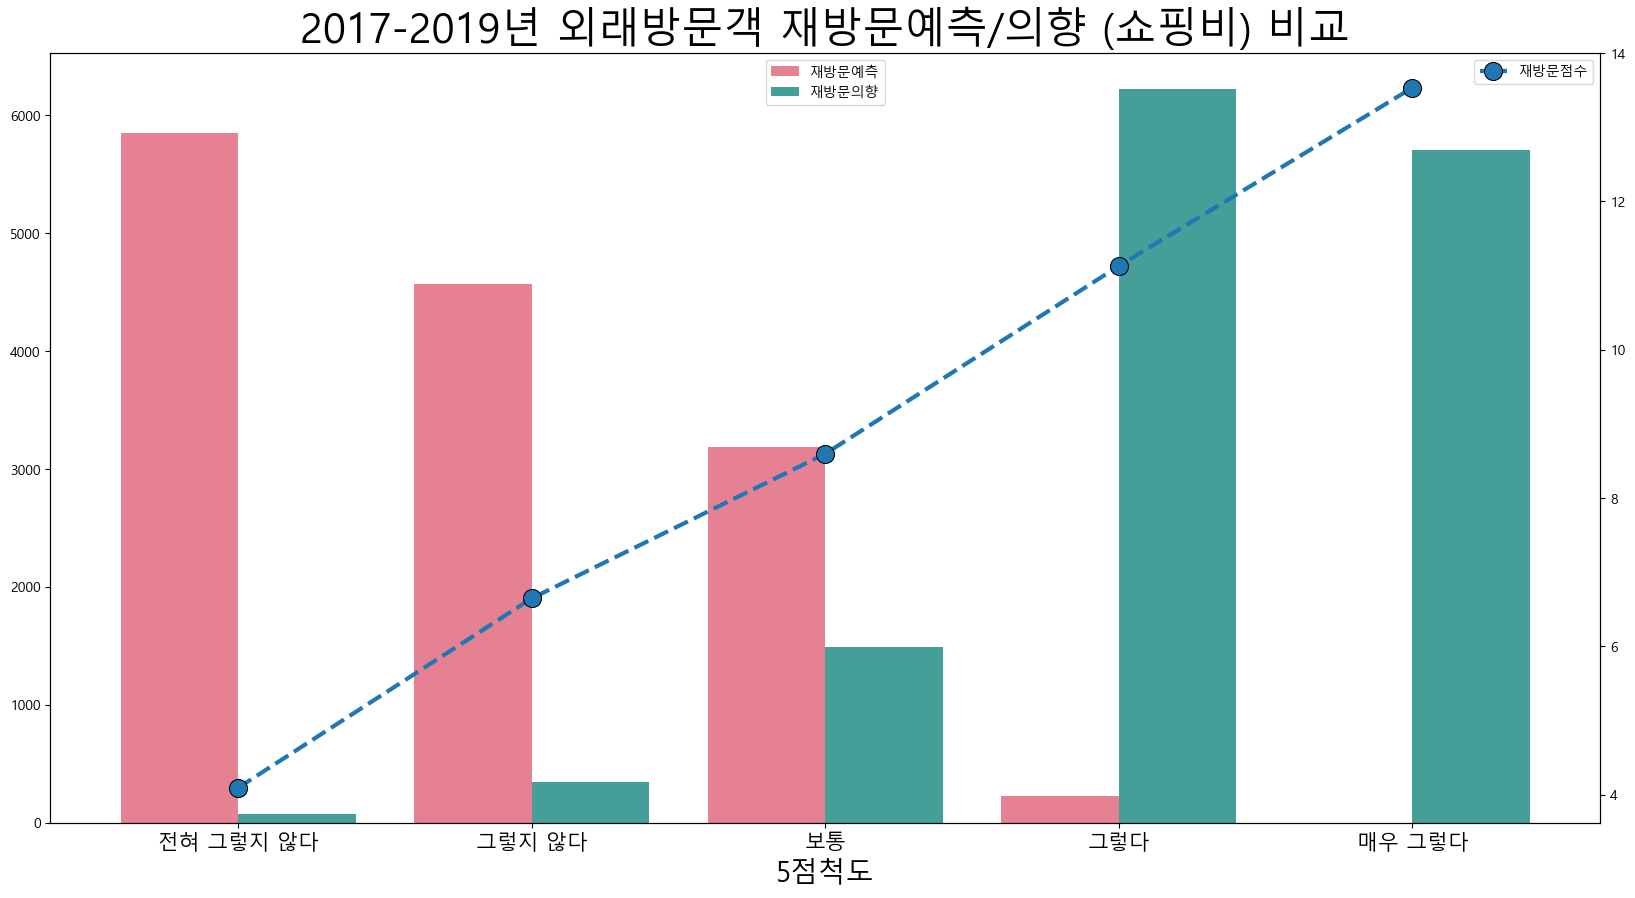

In [32]:
# 재방문예측 의향 시각화
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2017-2019년 외래방문객 재방문예측/의향 (쇼핑비) 비교', fontdict = {'fontsize': 30})
ax = sns.countplot(x = df_rfm6[df_rfm6['쇼핑비'] == 4.0]['재방문예측'], hue = '범주', palette = 'husl', data = df_rfm6)
ax.set_xticklabels(['전혀 그렇지 않다', '그렇지 않다', '보통', '그렇다', '매우 그렇다'], fontdict = {'fontsize': 15})
plt.xlabel('5점척도', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.legend(loc = 9)
ax2 = ax.twinx()
ax2 = sns.lineplot(x = pt_rfm2.index - 1, y = '재방문예측', data = pt_rfm2, ax = ax2,
                   marker = 'o', ms = 13, mec = 'black',
                   ls = '--', lw = 3, label = '재방문점수')
plt.legend()
plt.ylabel('')
plt.show()

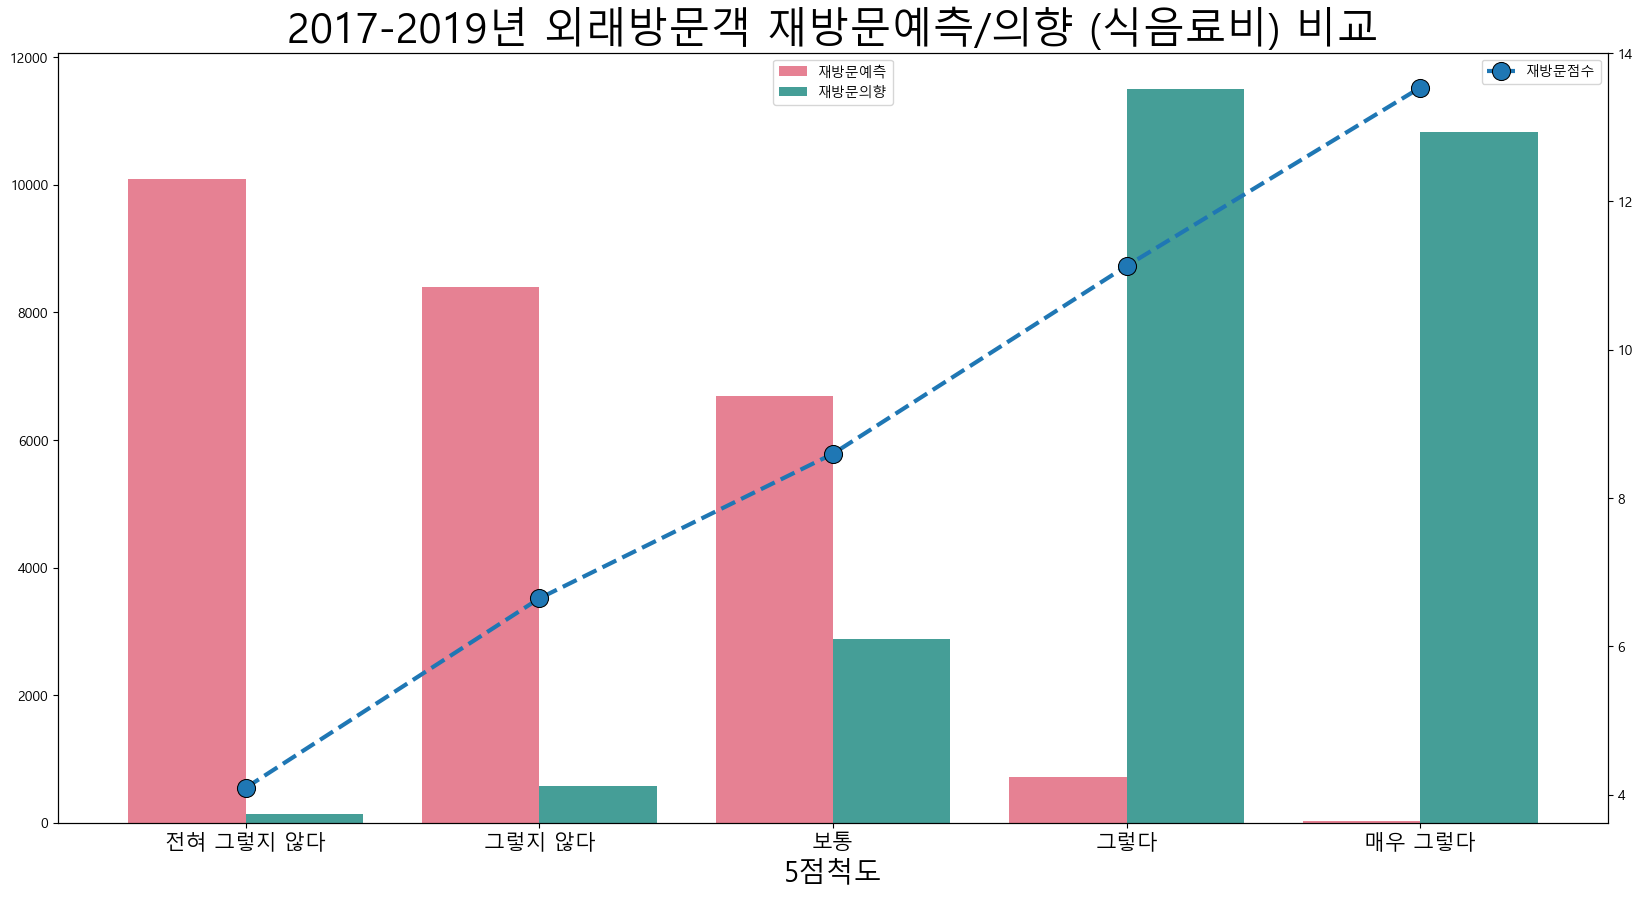

In [33]:
# 재방문예측 의향 시각화
plt.rcParams['figure.figsize'] = (20, 10)
plt.title('2017-2019년 외래방문객 재방문예측/의향 (식음료비) 비교', fontdict = {'fontsize': 30})
ax = sns.countplot(x = df_rfm6[df_rfm6['식음료비'] == 4.0]['재방문예측'], hue = '범주', palette = 'husl', data = df_rfm6)
ax.set_xticklabels(['전혀 그렇지 않다', '그렇지 않다', '보통', '그렇다', '매우 그렇다'], fontdict = {'fontsize': 15})
plt.xlabel('5점척도', fontdict = {'fontsize': 20})
plt.ylabel('')
plt.legend(loc = 9)
ax2 = ax.twinx()
ax2 = sns.lineplot(x = pt_rfm2.index - 1, y = '재방문예측', data = pt_rfm2, ax = ax2,
                   marker = 'o', ms = 13, mec = 'black',
                   ls = '--', lw = 3, label = '재방문점수')
plt.legend()
plt.ylabel('')
plt.show()